# <center>Google Advanced Data Analytics Capstone Project: Salifort Motors HR

## <center>Providing data-driven solutions using machine learning</center>

### <center>By Tyler Fernandez
    
###### <center>July 7, 2024

##### In this project, I will explore the fundamentals of machine learning by building and evaluating various models using Python. The primary focus will be on logistic regression, a powerful technique for binary classification problems, alongside decision trees and random forests. The project will begin with data cleaning and preprocessing to ensure the dataset is suitable for analysis. This step involves handling missing values, encoding categorical variables, and removing outliers in the numerical features to improve model performance.

##### Once the data is prepared, I will conduct exploratory data analysis (EDA) to uncover patterns and insights. This will involve visualizing relationships between variables and identifying potential predictors for the models. With a solid understanding of the data, I will proceed to develop a logistic regression model, as well as decision tree and random forest models, fine-tuning the decision tree and random forest models to achieve the best possible accuracy. Decision trees will help us understand the decision-making process, while random forests, an ensemble method, will improve prediction accuracy and reduce overfitting.

##### Throughout the project, I will emphasize the importance of model evaluation using metrics such as accuracy, precision, recall, the Area Under Curve (AUC) score and Receiver Operating Characteristic (ROC) curve. By iteratively improving the models based on these metrics using feature engineering, I will aim to build robust and reliable predictive models. The final step will involve summarizing the findings and discussing potential improvements and future directions for the project. This comprehensive approach will not only showcase the power of machine learning but also highlight the critical steps required for successful model development and deployment.

##### In this notebook, I will use a logistic regression model and two machine learning models to predict whether or not an employee will leave the company given certain data.

##### Deliverables will include the model evaluation, interpretation, data visualizations related to the questions asked, ethical considerations, and recommendations for business stakeholders and leaders.

##### This process will follow the PACE framework: Plan, Analyze, Construct, and Execute (pictured below).

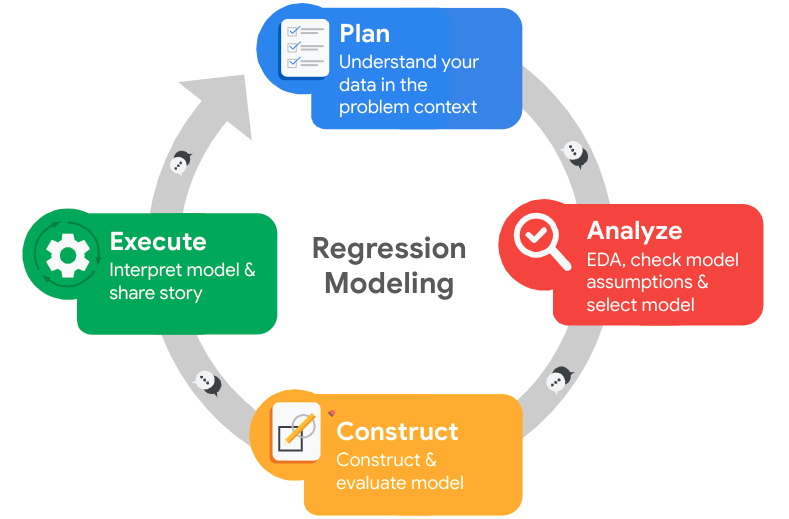

# **Pace: Plan**

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They ask me to provide data-driven suggestions based on my understanding of the data. They have the following question: what’s likely to make the employee leave the company?

My goals for this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If I can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarizing myself with the HR dataset

The dataset that I will be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Reflecting on these questions as I complete the plan stage:

Who are my stakeholders for this project?
- The primary stakeholder is the HR team.
- The secondary stakeholder are the Senior Leadership team and the Employees of Salifort Motors
- The tertiary stakeholder is the Data Analyst team performing the analysis

What am I trying to accomplish? What is the target outcome?
- Gain insight into the data by conducting a comprehensive analysis to determine factors affecting employee retention.
- Develop a predictive model to identify employees likely to leave.
- Identify factors that influence an employee to leave.
- Provide the HR team and Leadership Team data-drive recommendations to improve the company's employee retention efforts.

What are my ethical considerations at this stage?
- At this stage I must ensure that this data remains confidential. Any revealing information that can be traced back to an employee should be kept secure.
- The ability to predict someone's action in the future using their data should be carefully guarded.
- Careful consideration to the access of these predictions should be made. The possibility of using this data or the model's predictions to retaliate or otherwise harm an employee is present.
- Any possible biases should be accounted for and elimnated. Fairness should be kept in mind while developing this analysis and models to avoid discrimination against any individual or group.
- The methodologies, assumptions, analysis, and model creation should be documented in full to remain accountable for all findings and recommendations.

What observations do I have regarding the data?
- Looking at the table above, some variables are binary, some are numerical, and some are text. This will influence the data processing stage. Ensuring certain variable data types and their observations are interpreted correclty will be paramount.
- Correlations should be calculated to give some insight into relationships between variables, especially the target variable, Left.


# pAce: Analyze

### Questions I will reflect on as I complete the analyze stage:

- What did I observe about the relationships between variables?
- What did I observe about the distributions in the data?
- What transformations did I make with the data? Why did I chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- Do I have any ethical considerations in this stage?




#### Begin the Python package importing and data loading stage

#### Python Package Imports

In [1]:
# Import packages
### YOUR CODE HERE ### 

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

#### Data loading from CSV file and initial look at table

Using Pandas to read in CSV file and look at first 10 rows of table

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head(10)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   
6                0.10             0.77               6                   247   
7                0.92             0.85               5                   259   
8                0.89             1.00               5                   224   
9                0.42             0.53               2                   142   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   
5                   3              0     1                      0      sales   
6                   4              0     1                      0      sales   
7                   5              0     1                      0      sales   
8                   5              0     1                      0      sales   
9                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low  
5     low  
6     low  
7     low  
8     low  
9     low

#### Looking at the shape of the table

We can see that the table's shape is 14999 rows deep and 10 columns wide

In [3]:
df0.shape

(14999, 10)

#### Looking at the table's descriptive statistics

We can see that some variables contain NaN values for certain metrics like Unique, Top, Frequency, Mean, Standard Deviation, and Quartiles. This means the specific statistic is not relevant or cannot be computed for the column's data type.

We also see the maximum and minimum values for several variables like Satisfaction Level, Last Evaluation, Work Accident, Left, and Promotion Last 5 Years. These variables also have a minimum of 0. This may mean some of the values are binary.

For Department, the top value is "sales", occurring 4140 times. For Salary, the top value is "low", occurring 7316 times.

In [4]:
## FROM yosifov ##

df0.describe(include="all")

satisfaction_level  last_evaluation  number_project  \
count         14999.000000     14999.000000    14999.000000   
unique                 NaN              NaN             NaN   
top                    NaN              NaN             NaN   
freq                   NaN              NaN             NaN   
mean              0.612834         0.716102        3.803054   
std               0.248631         0.171169        1.232592   
min               0.090000         0.360000        2.000000   
25%               0.440000         0.560000        3.000000   
50%               0.640000         0.720000        4.000000   
75%               0.820000         0.870000        5.000000   
max               1.000000         1.000000        7.000000   

        average_montly_hours  time_spend_company  Work_accident          left  \
count           14999.000000        14999.000000   14999.000000  14999.000000   
unique                   NaN                 NaN            NaN           NaN   
top                      NaN                 NaN            NaN           NaN   
freq                     NaN                 NaN            NaN           NaN   
mean              201.050337            3.498233       0.144610      0.238083   
std                49.943099            1.460136       0.351719      0.425924   
min                96.000000            2.000000       0.000000      0.000000   
25%               156.000000            3.000000       0.000000      0.000000   
50%               200.000000            3.000000       0.000000      0.000000   
75%               245.000000            4.000000       0.000000      0.000000   
max               310.000000           10.000000       1.000000      1.000000   

        promotion_last_5years Department salary  
count            14999.000000      14999  14999  
unique                    NaN         10      3  
top                       NaN      sales    low  
freq                      NaN       4140   7316  
mean                 0.021268        NaN    NaN  
std                  0.144281        NaN    NaN  
min                  0.000000        NaN    NaN  
25%                  0.000000        NaN    NaN  
50%                  0.000000        NaN    NaN  
75%                  0.000000        NaN    NaN  
max                  1.000000        NaN    NaN

#### Looking at the table's data types

We can see that there are 2 float variables, 6 integer variables, and 2 object variables.

In [5]:
## FROM me :) ##

df0.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

#### Looking at the table's information

We can see from this output that there are 10 variables with different data types. It also tells us there are 14999 non-null types in every column. This means there are 0 null values in every column. Since we know the data shape is 14999 rows deep, we know there are 0 null values in the entire table.

In [6]:
## FROM me :) ##

df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### Looking at the table's unique values for the Department variable

We can see the array contains 10 unique values for the Department variable.

In [7]:
## FROM me :) ##

df0['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

#### Looking at the table's unique values for the Salary variable

We see there are 3 unique values for the Salary variable.

In [8]:
## FROM me :) ##

df0['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

#### Renaming the variables to correct spelling and capitalization

We see from the above tables that some columns are not correctly spelled or contain capitalization. I will update the column names to ensure standardization of variables to all lower case and using the underscore for any spacing.

In [9]:
## FROM SubUrban ##

# Renaming columns for consistency
df0.rename(columns={
    'average_montly_hours': 'average_monthly_hours',
    'Work_accident': 'work_accident',
    'Department': 'department'
}, inplace=True)

# Displaying all column names after the update
print(df0.dtypes)

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
time_spend_company         int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object


#### Looking for values that are N/A

We see that every variable contains 0 N/A values.

In [10]:
## FROM me :) ##

df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

#### Looking for duplicated variables

This output shows there are a total of 3008 duplicates in the original table.

In [11]:
## FROM SubUrban ##

# Check for duplicates
duplicates = df0.duplicated().sum()

print(f"the number of duplicates is: {duplicates}")

the number of duplicates is: 3008


#### Inspecting a table of duplicated values from the original table

In [12]:
## FROM SubUrban ##

# Inspect some rows containing duplicates as needed
duplicates_df = df0[df0.duplicated(keep=False)]

duplicates_df.head(25)

satisfaction_level  last_evaluation  number_project  \
0                 0.38             0.53               2   
1                 0.80             0.86               5   
2                 0.11             0.88               7   
3                 0.72             0.87               5   
4                 0.37             0.52               2   
5                 0.41             0.50               2   
6                 0.10             0.77               6   
7                 0.92             0.85               5   
8                 0.89             1.00               5   
9                 0.42             0.53               2   
10                0.45             0.54               2   
11                0.11             0.81               6   
12                0.84             0.92               4   
13                0.41             0.55               2   
14                0.36             0.56               2   
15                0.38             0.54               2   
16                0.45             0.47               2   
17                0.78             0.99               4   
18                0.45             0.51               2   
19                0.76             0.89               5   
20                0.11             0.83               6   
21                0.38             0.55               2   
22                0.09             0.95               6   
23                0.46             0.57               2   
24                0.40             0.53               2   

    average_monthly_hours  time_spend_company  work_accident  left  \
0                     157                   3              0     1   
1                     262                   6              0     1   
2                     272                   4              0     1   
3                     223                   5              0     1   
4                     159                   3              0     1   
5                     153                   3              0     1   
6                     247                   4              0     1   
7                     259                   5              0     1   
8                     224                   5              0     1   
9                     142                   3              0     1   
10                    135                   3              0     1   
11                    305                   4              0     1   
12                    234                   5              0     1   
13                    148                   3              0     1   
14                    137                   3              0     1   
15                    143                   3              0     1   
16                    160                   3              0     1   
17                    255                   6              0     1   
18                    160                   3              1     1   
19                    262                   5              0     1   
20                    282                   4              0     1   
21                    147                   3              0     1   
22                    304                   4              0     1   
23                    139                   3              0     1   
24                    158                   3              0     1   

    promotion_last_5years department  salary  
0                       0      sales     low  
1                       0      sales  medium  
2                       0      sales  medium  
3                       0      sales     low  
4                       0      sales     low  
5                       0      sales     low  
6                       0      sales     low  
7                       0      sales     low  
8                       0      sales     low  
9                       0      sales     low  
10                      0      sales     low  
11                      0      sales     low  
12                      0      sales 

#### Dropping the duplicates and creating a new table free of those duplicates

We want to remove duplicates to ensure integrity of the data analysis.

In [13]:
## FROM me :) ##

df1 = df0.drop_duplicates()

#### Inspecting the shape of the new table with duplicates removed

We see now a new shape. The total number of rows is 11,991, but still 10 columns (variables).

In [14]:
## FROM me :) ##

df1.shape

(11991, 10)

#### Mathematically confirming the difference between the original dataset and the new dataset with duplicates removed will add up to the size of the original dataset

We want to ensure the change from the original table to the new table is mathematically aligning. If we see the original row values and the new row values do not add up, there is an issue with the data cleaning that needs to be addressed.

In [15]:
## FROM hari ##

# mathematically confirming that the difference between the cleaned dataset and the original dataset that contained duplicate values adds up to the count of observations in the original dataset 

11991+3008

14999

#### Looking at the descriptive statistics of the cleaned dataset

We want to look again at the descriptive statistics of the cleaned dataset to ensure variables did not change dramatically, such as minimums or maximums decreasing or increasing.

Again, we can see that some variables contain NaN values for certain metrics like Unique, Top, Frequency, Mean, Standard Deviation, and Quartiles. This means the specific statistic is not relevant or cannot be computed for the column's data type.


In [16]:
df1.describe(include="all")

satisfaction_level  last_evaluation  number_project  \
count         11991.000000     11991.000000    11991.000000   
unique                 NaN              NaN             NaN   
top                    NaN              NaN             NaN   
freq                   NaN              NaN             NaN   
mean              0.629658         0.716683        3.802852   
std               0.241070         0.168343        1.163238   
min               0.090000         0.360000        2.000000   
25%               0.480000         0.570000        3.000000   
50%               0.660000         0.720000        4.000000   
75%               0.820000         0.860000        5.000000   
max               1.000000         1.000000        7.000000   

        average_monthly_hours  time_spend_company  work_accident  \
count            11991.000000        11991.000000   11991.000000   
unique                    NaN                 NaN            NaN   
top                       NaN                 NaN            NaN   
freq                      NaN                 NaN            NaN   
mean               200.473522            3.364857       0.154282   
std                 48.727813            1.330240       0.361234   
min                 96.000000            2.000000       0.000000   
25%                157.000000            3.000000       0.000000   
50%                200.000000            3.000000       0.000000   
75%                243.000000            4.000000       0.000000   
max                310.000000           10.000000       1.000000   

                left  promotion_last_5years department salary  
count   11991.000000           11991.000000      11991  11991  
unique           NaN                    NaN         10      3  
top              NaN                    NaN      sales    low  
freq             NaN                    NaN       3239   5740  
mean        0.166041               0.016929        NaN    NaN  
std         0.372133               0.129012        NaN    NaN  
min         0.000000               0.000000        NaN    NaN  
25%         0.000000               0.000000        NaN    NaN  
50%         0.000000               0.000000        NaN    NaN  
75%         0.000000               0.000000        NaN    NaN  
max         1.000000               1.000000        NaN    NaN

#### Determining the number of employees who left versus stayed

We want to review the ratio of the left variable, where 0 is considered "stayed", and 1 is considered "left". 1 means the employee left the company. Left is the target variable during the machine learning phase.

In [17]:
## FROM yosifov ##

# Get numbers of people who left vs. stayed
left = df1[df1['left'] == 1].count()[0]
stayed = df1[df1['left'] == 0].count()[0]

print("Employees left: {:>6}".format(left))
print("Employees stayed: {}".format(stayed))

# Get percentages of people who left vs. stayed
print("Employees left: {:>4.0f}%".format((left/df1.shape[0])*100))
print("Employees stayed: {:.0f}%".format((stayed/df1.shape[0])*100))

Employees left:   1991
Employees stayed: 10000
Employees left:   17%
Employees stayed: 83%


#### Creating a table to group those who left versus stayed

Creating a table helps organize the left versus stayed ratios.

In [18]:
## FROM me :) ##

df1.groupby(['left']).count()

satisfaction_level  last_evaluation  number_project  \
left                                                        
0                  10000            10000           10000   
1                   1991             1991            1991   

      average_monthly_hours  time_spend_company  work_accident  \
left                                                             
0                     10000               10000          10000   
1                      1991                1991           1991   

      promotion_last_5years  department  salary  
left                                             
0                     10000       10000   10000  
1                      1991        1991    1991

#### Tables will help us understand more about the distribution with the left variable. Since that is the target variable, it will benefit us to closely review the distributions in every variable possible. The possible variables will be the integer or object data types. Continuous variables will not be included.

Creating a table to group those who left versus stayed by the variable number_of_projects

In [19]:
## FROM Gemini ##

grouped_data = df1.groupby('left')['number_project'].value_counts().sort_index(ascending = False)
print(grouped_data)

left  number_project
1     7                  145
      6                  371
      5                  343
      4                  237
      3                   38
      2                  857
0     6                  455
      5                 1890
      4                 3448
      3                 3482
      2                  725
Name: number_project, dtype: int64


Creating a table to group those who left versus stayed by the variable time_spend_company

In [20]:
## FROM Gemini ##

grouped_data = df1.groupby('left')['time_spend_company'].value_counts().sort_index(ascending = False)
print(grouped_data)

left  time_spend_company
1     6                      109
      5                      482
      4                      495
      3                      874
      2                       31
0     10                     107
      8                       81
      7                       94
      6                      433
      5                      580
      4                     1510
      3                     4316
      2                     2879
Name: time_spend_company, dtype: int64


Creating a table to group those who left versus stayed by the variable work_accident, where 1 is a work accident occurring

In [21]:
## FROM Gemini ##

grouped_data = df1.groupby('left')['work_accident'].value_counts().sort_index(ascending = False)
print(grouped_data)

left  work_accident
1     1                 105
      0                1886
0     1                1745
      0                8255
Name: work_accident, dtype: int64


Creating a table to group those who left versus stayed by the variable promotion_last_5_years, where 1 is a promotion occurring

In [22]:
## FROM Gemini ##

grouped_data = df1.groupby('left')['promotion_last_5years'].value_counts().sort_index(ascending = False)
print(grouped_data)

left  promotion_last_5years
1     1                           8
      0                        1983
0     1                         195
      0                        9805
Name: promotion_last_5years, dtype: int64


Creating a table to group those who left versus stayed by the variable department

In [23]:
## FROM Gemini ##

grouped_data = df1.groupby('left')['department'].value_counts().sort_index(ascending = False)
print(grouped_data)

left  department 
1     technical       390
      support         312
      sales           550
      product_mng     110
      marketing       112
      management       52
      hr              113
      accounting      109
      RandD            85
      IT              158
0     technical      1854
      support        1509
      sales          2689
      product_mng     576
      marketing       561
      management      384
      hr              488
      accounting      512
      RandD           609
      IT              818
Name: department, dtype: int64


Creating a table to group those who left versus stayed by the variable salary

In [24]:
## FROM Gemini ##

grouped_data = df1.groupby('left')['salary'].value_counts()
print(grouped_data)

left  salary
0     low       4566
      medium    4492
      high       942
1     low       1174
      medium     769
      high        48
Name: salary, dtype: int64


#### Creating bar chart of the variable Left

A bar chart will help us visually review the distribution of the target variable Left. Because this variable is so important, we want to get as much information on it as possible and understand it early in the analysis.

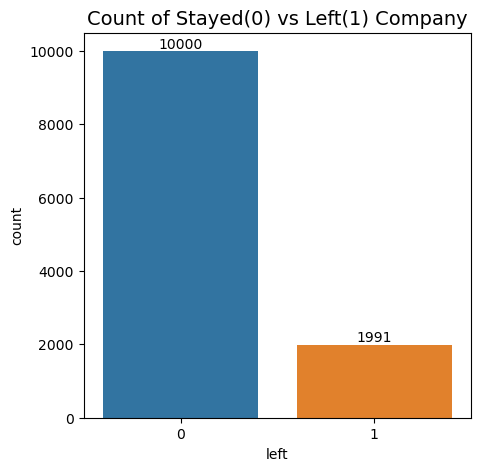

In [25]:
## FROM SubUrban ##

plt.figure(figsize=(5,5))
plt.title('Count of Stayed(0) vs Left(1) Company', fontsize = 14)
ax = sns.countplot(x='left', data=df1)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

#### Creating a function to determine value counts for categorical, numerical, or non-continuous variables

This function allows us to determine all counts of left versus stayed for each variable, but still regarding the data type. This table set will only include integer or categorical variables. Continuous variables will not be included.

In [26]:
selected_columns = ['salary', 'department', 'promotion_last_5years', 'left', 'work_accident', 'time_spend_company', 'number_project']

for col in selected_columns:
    value_counts = df1[col].value_counts()
    print(f"Value Counts for column {col}:")
    print(value_counts)
    print("-" * 20)

Value Counts for column salary:
low       5740
medium    5261
high       990
Name: salary, dtype: int64
--------------------
Value Counts for column department:
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64
--------------------
Value Counts for column promotion_last_5years:
0    11788
1      203
Name: promotion_last_5years, dtype: int64
--------------------
Value Counts for column left:
0    10000
1     1991
Name: left, dtype: int64
--------------------
Value Counts for column work_accident:
0    10141
1     1850
Name: work_accident, dtype: int64
--------------------
Value Counts for column time_spend_company:
3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: time_spend_company, dtype: int64
--------------------
Value Counts for column number_project:
4    3685

#### Creating a function to calculate the distribution of employees at each year spent at the company
This helps us see which year has the highest employee count, and which years are less. The output is sorted by years in descending order.

In [27]:
## FROM Gemini ##

value_range = range(2,11)
value_range = sorted(value_range, reverse=True)

def get_count(val):
    count = df1[df1['time_spend_company'] == val].shape[0]
    return count
                
value_counts = {val: get_count(val) for val in value_range}

for val, count in value_counts.items():
                print(f"Count for time_spend_company (years)= {val}: {count}")

Count for time_spend_company (years)= 10: 107
Count for time_spend_company (years)= 9: 0
Count for time_spend_company (years)= 8: 81
Count for time_spend_company (years)= 7: 94
Count for time_spend_company (years)= 6: 542
Count for time_spend_company (years)= 5: 1062
Count for time_spend_company (years)= 4: 2005
Count for time_spend_company (years)= 3: 5190
Count for time_spend_company (years)= 2: 2910


#### Create a function to graph boxplots for float and integer variables
We now want to explore outliers. Outliers can help us visually understand the distribution of values for each variable. We will reveal the outliers visually, then look to calculate them numerically.

In [28]:
## FROM SubUrban ##

# Determine the number of rows containing outliers

import seaborn as sns
import matplotlib.pyplot as plt

def visualize_outliers(df):
    # Get list of numerical columns
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    for column_name in numerical_columns:
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        
        outliers = df[(df[column_name] < lower_limit) | (df[column_name] > upper_limit)]
        
        # Box plot
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[column_name])
        plt.title(f'Box Plot of Variable: {column_name}')
        plt.show()
        
        print(f'Number of rows containing outliers in {column_name}: {len(outliers)}')

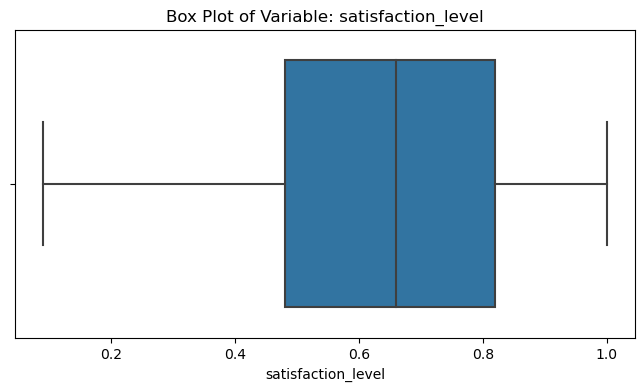

Number of rows containing outliers in satisfaction_level: 0


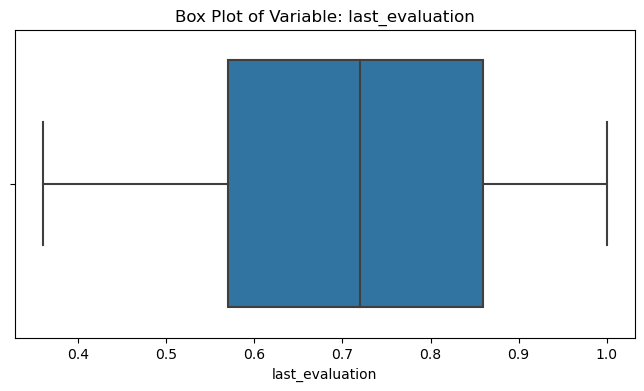

Number of rows containing outliers in last_evaluation: 0


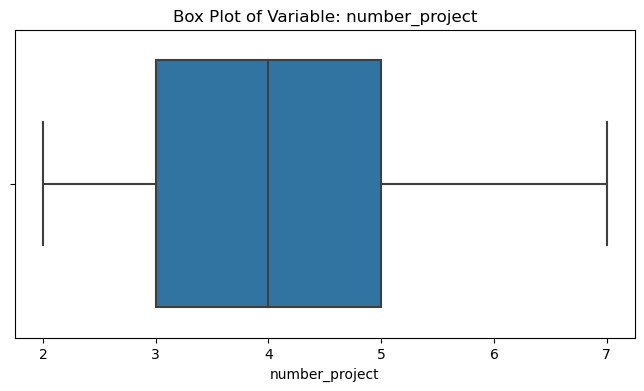

Number of rows containing outliers in number_project: 0


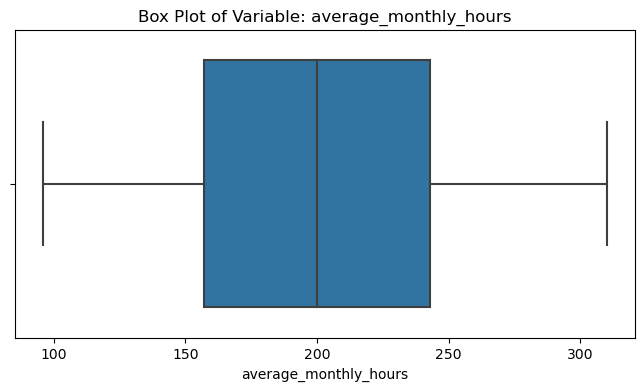

Number of rows containing outliers in average_monthly_hours: 0


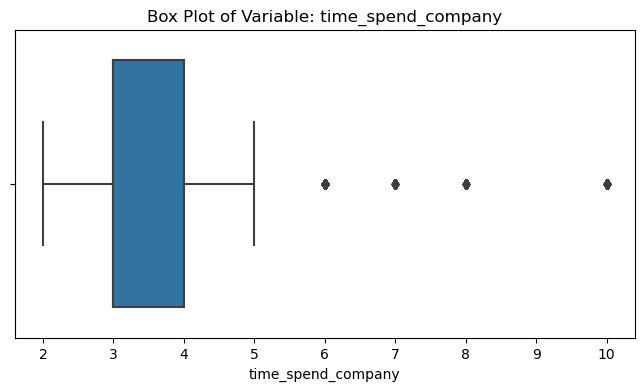

Number of rows containing outliers in time_spend_company: 824


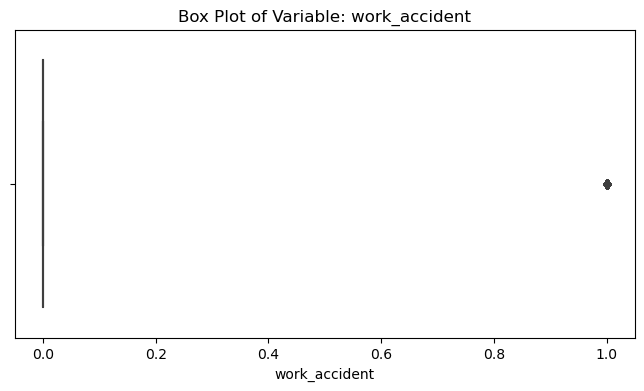

Number of rows containing outliers in work_accident: 1850


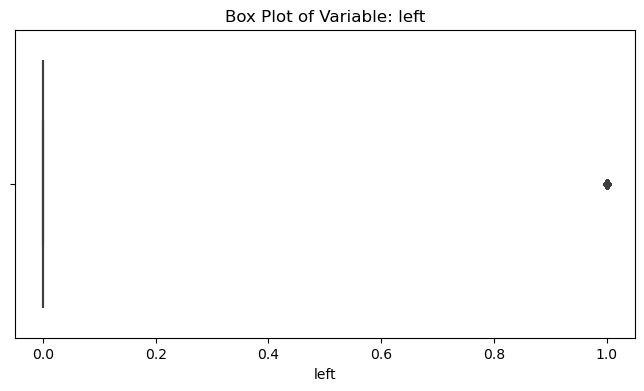

Number of rows containing outliers in left: 1991


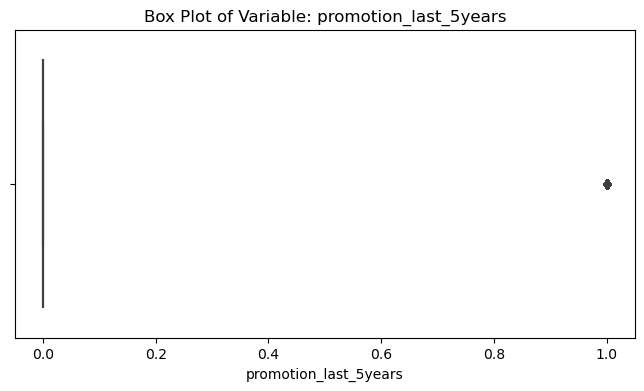

Number of rows containing outliers in promotion_last_5years: 203


In [29]:
## FROM SubUrban ##

visualize_outliers(df1)

#### Create a function to numerically compute outliers
This function will calculate outliers which we can use in future analysis and manipulation.

We see that several variables contain outliers. Time Spend Company, Work Accident, and Promotion Last 5 Years contain outliers. The target variable Left contains 1,991 outliers. This matches the earlier calculated number of 1,991 employees who left the company.

In [30]:
## FROM ChatGPT ##

# Assuming df1 is your DataFrame

# Create a dictionary to store the outlier information for each column
outlier_info = {}

# Loop through each column in the DataFrame
for column in df1.columns:
    # Skip non-numeric columns
    if not pd.api.types.is_numeric_dtype(df1[column]):
        continue
    
    # Compute the 25th percentile value
    percentile25 = df1[column].quantile(0.25)
    
    # Compute the 75th percentile value
    percentile75 = df1[column].quantile(0.75)
    
    # Compute the interquartile range
    iqr = percentile75 - percentile25
    
    # Define the upper limit and lower limit for non-outlier values
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    
    # Identify subset of data containing outliers
    outliers = df1[(df1[column] > upper_limit) | (df1[column] < lower_limit)]
    
    # Store the outlier information in the dictionary
    outlier_info[column] = {
        "lower_limit": lower_limit,
        "upper_limit": upper_limit,
        "outliers_count": len(outliers)
    }
    
    # Print the outlier information for the current column
    print(f"Column: {column}")
    print(f"Lower limit: {lower_limit}")
    print(f"Upper limit: {upper_limit}")
    print(f"Number of rows containing outliers in `{column}`: {len(outliers)}")
    print()

# If needed, you can use the `outlier_info` dictionary for further analysis


Column: satisfaction_level
Lower limit: -0.030000000000000027
Upper limit: 1.33
Number of rows containing outliers in `satisfaction_level`: 0

Column: last_evaluation
Lower limit: 0.1349999999999999
Upper limit: 1.295
Number of rows containing outliers in `last_evaluation`: 0

Column: number_project
Lower limit: 0.0
Upper limit: 8.0
Number of rows containing outliers in `number_project`: 0

Column: average_monthly_hours
Lower limit: 28.0
Upper limit: 372.0
Number of rows containing outliers in `average_monthly_hours`: 0

Column: time_spend_company
Lower limit: 1.5
Upper limit: 5.5
Number of rows containing outliers in `time_spend_company`: 824

Column: work_accident
Lower limit: 0.0
Upper limit: 0.0
Number of rows containing outliers in `work_accident`: 1850

Column: left
Lower limit: 0.0
Upper limit: 0.0
Number of rows containing outliers in `left`: 1991

Column: promotion_last_5years
Lower limit: 0.0
Upper limit: 0.0
Number of rows containing outliers in `promotion_last_5years`: 203


#### Create a histogram of distribution for 8 variables

This histogram helps us visually understand the distribution of 8 numerical or binary variables. Satisfaction Level appears to be skewed to the left. The Number Project, Time Spend Company, Work Accident, Promotion Last 5 Years, and the target variable Left appear to be skewed to the right. The Last Evaluation variable appears to be distributed normally. The histogram does not include the categorical variables Department or Salary.

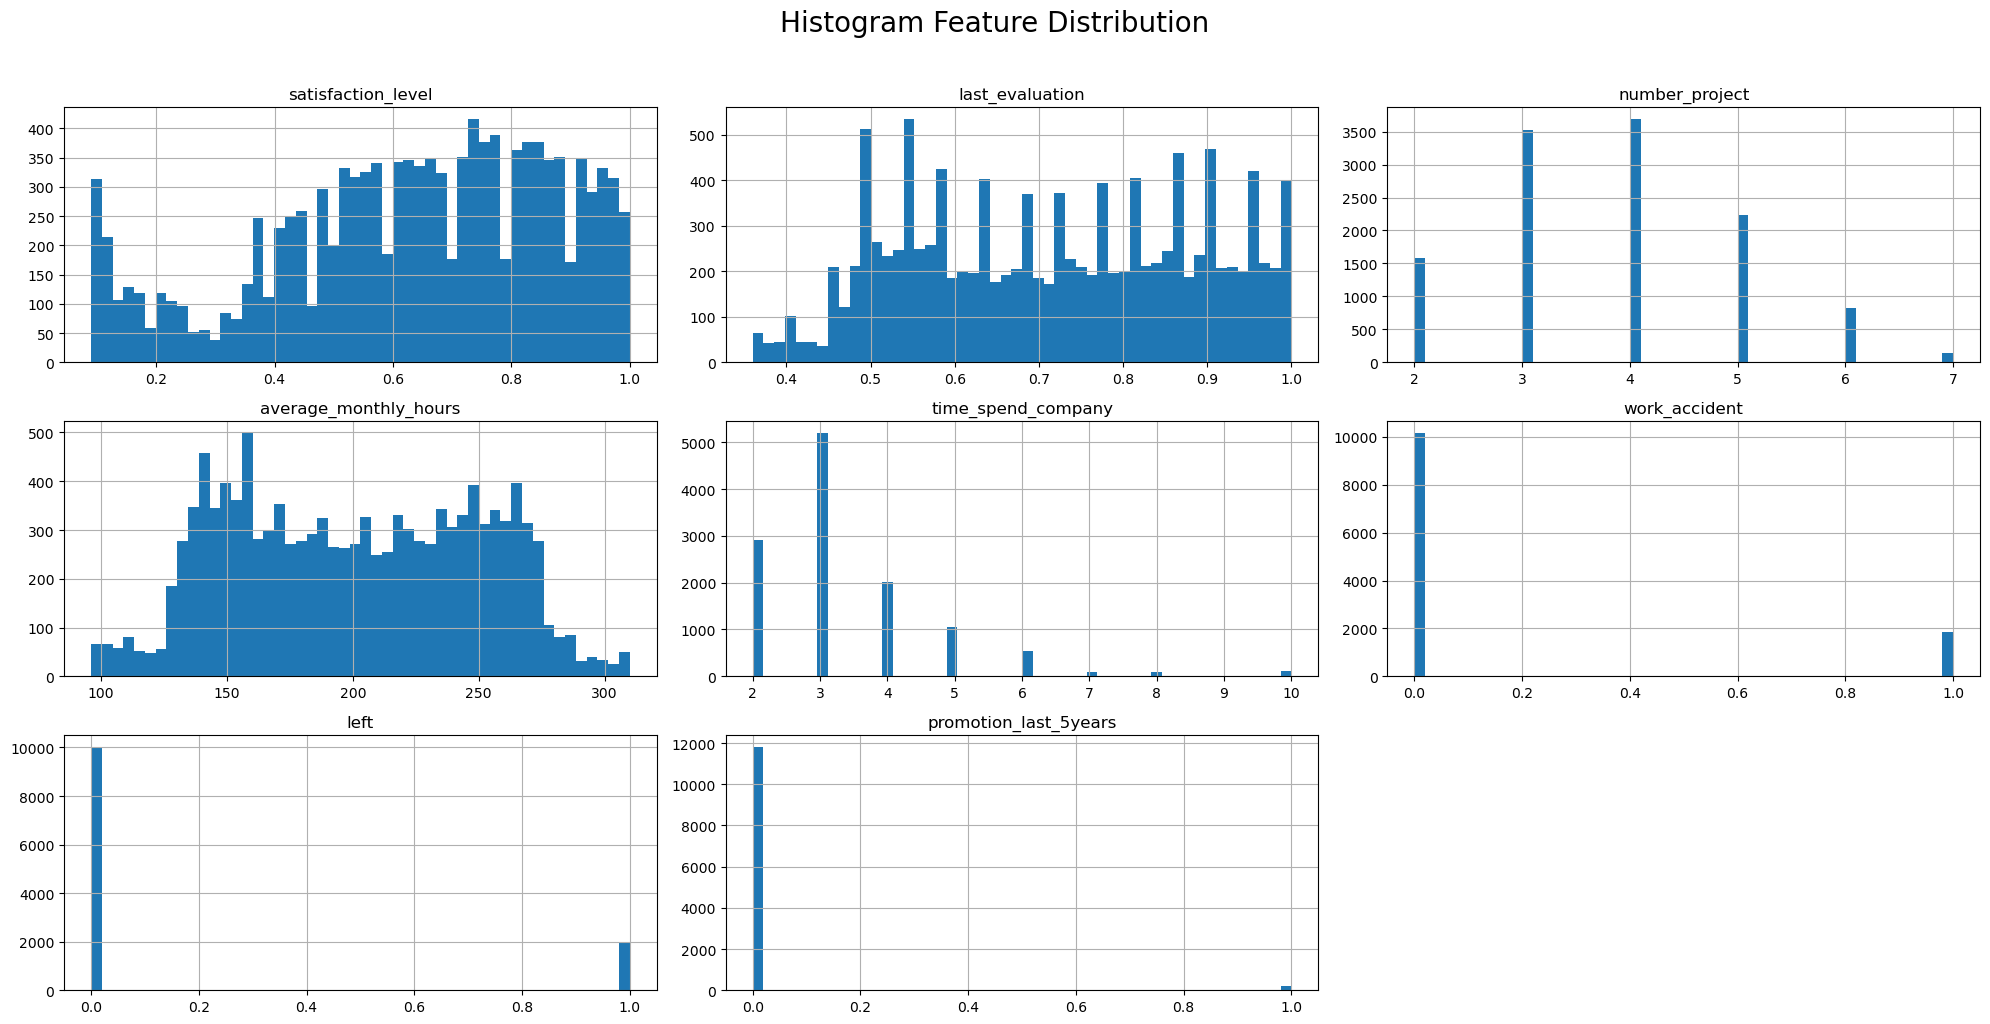

In [31]:
## FROM dennis ##

df1.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

#### Create plot functions to visually explore the distributions of the count of employees who Stayed versus Left for all variables except average monthly hours
Revealing how distributions rise and fall for different variables can clue us in to trends in categorical and integer variables, helping us quickly see how many employees left versus stayed in different groups.

Create plot of Stayed versus Left by the variable Promotion Last 5 Years

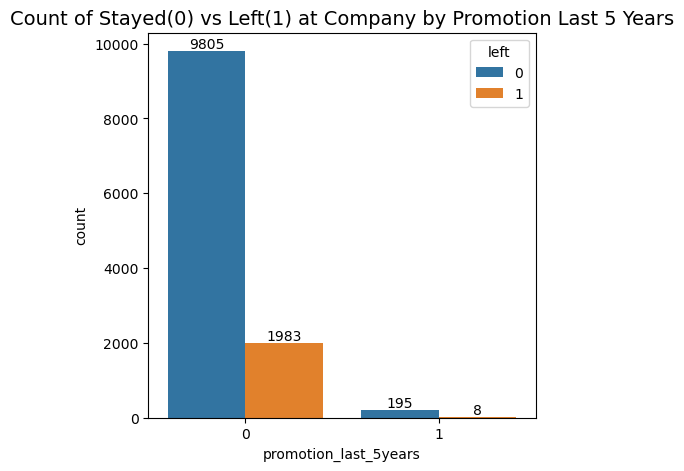

In [32]:
## FROM SubUrban ##

plt.figure(figsize=(5,5))
plt.title('Count of Stayed(0) vs Left(1) at Company by Promotion Last 5 Years', fontsize = 14)
ax = sns.countplot(x='promotion_last_5years', hue='left', data=df1)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

##### Create plot of Stayed versus Left by the variable Salary Level
The chart shows a good look into how salary levels might affect if an employee leaves. The "low" salary category has the highest count, followed by "medium".

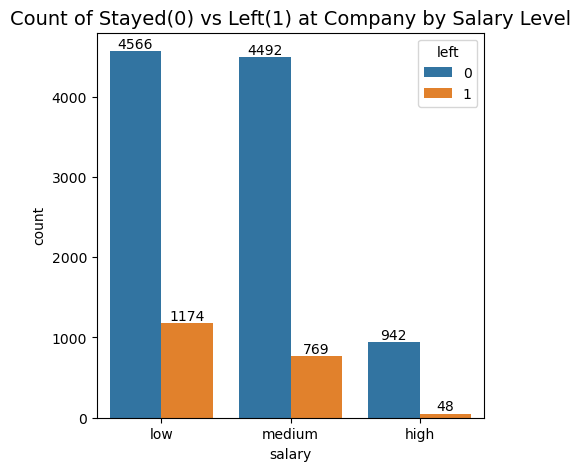

In [33]:
## FROM SubUrban ##

plt.figure(figsize=(5,5))
plt.title('Count of Stayed(0) vs Left(1) at Company by Salary Level', fontsize = 14)
ax = sns.countplot(x='salary', hue='left', data=df1)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

##### Create plot of Stayed versus Left by the variable Work Accident
We quickly see that the majority of employees who left do not experience an accident at work. If we explore the ratios of leaving or staying versus experiencing an accident, we see that of those who did not experience an accident left at a ratio of 23%, while those who experienced an accident at work left at a ratio of 6%.

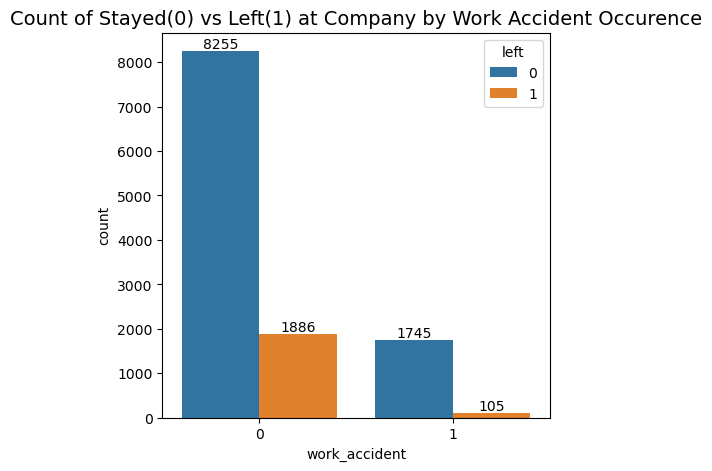

In [34]:
## FROM SubUrban ##

plt.figure(figsize=(5,5))
plt.title('Count of Stayed(0) vs Left(1) at Company by Work Accident Occurence', fontsize = 14)
ax = sns.countplot(x='work_accident', hue='left', data=df1)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

##### Create plot of Stayed versus Left by the variable Department
We quickly see that the Sales deparment has the highest number of employees who left at 550, and Technical having the second highest at 390. This could clue us in on what roles experience the highest turnover in the company.

Also visible is the count of employees who stayed at the company. The Sales department had the highest amount of employees who stayed. Coupled with the observation that the highest count of employees who left the company, we can surmise that the Sales department has the largest number of employees.

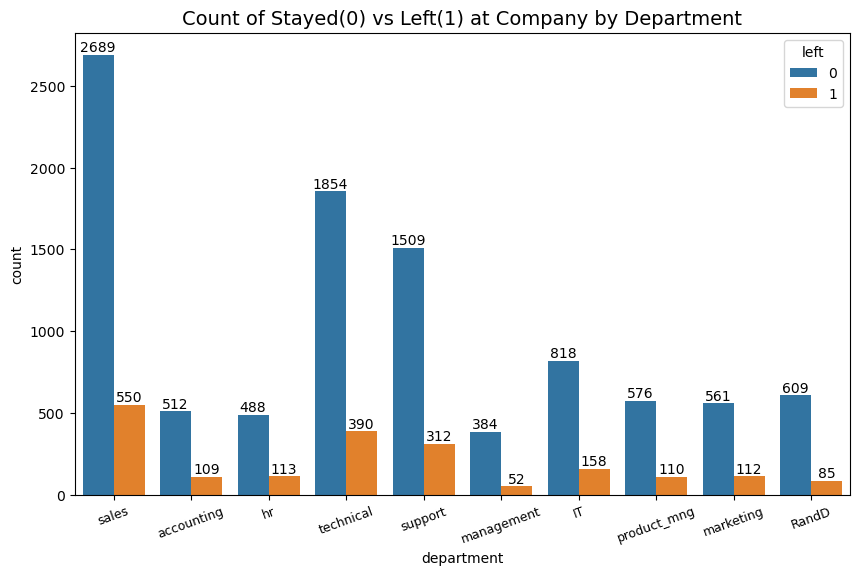

In [35]:
## FROM SubUrban ##

plt.figure(figsize=(10,6))
plt.title('Count of Stayed(0) vs Left(1) at Company by Department', fontsize = 14)
plt.xticks(rotation=20, size=9)
ax = sns.countplot(x='department', hue='left', data=df1)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

##### Create plot of Stayed versus Left by the variable Number of Projects
We quickly see that 7 projects have 145 employees who left, and 0 who stayed. It is worth investigating further to ensure this is correct.

We also observe that those empoyees with 3 to 4 projects had the highest count of employees who stayed at the company. This could mean there is a optimal number of projects for an employee to be assigned if the company wants to keep that employee.

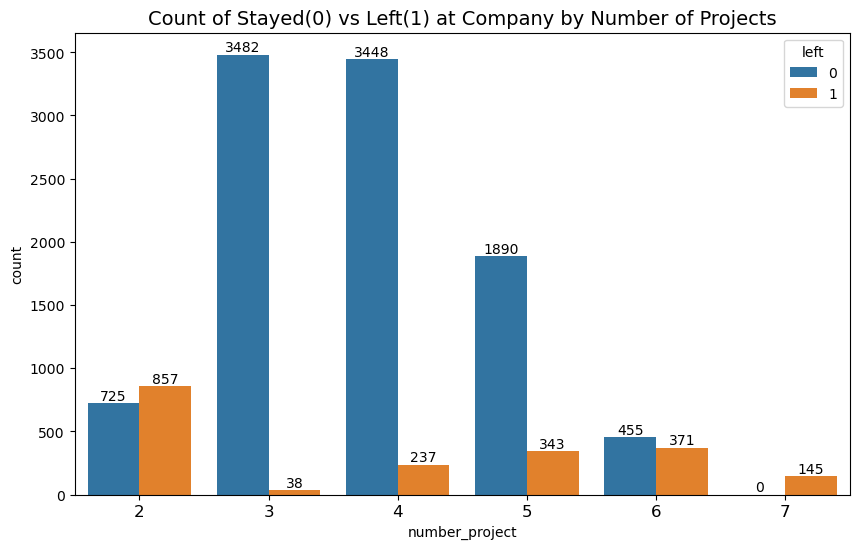

In [36]:
## FROM SubUrban and me :) ##

plt.figure(figsize=(10,6))
plt.title('Count of Stayed(0) vs Left(1) at Company by Number of Projects', fontsize = 14)
plt.xticks(size=12)
ax = sns.countplot(x='number_project', hue='left', data=df1)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

Since this is the only variable which has shown to have employees leaving and none staying for a certain value, it is worth ensuring this is correct. We will ensure this by calculating this using the value_counts function. We get a value of 145, which matches the count in the chart above. It may be worth confirming that the value for an employee having 7 projects is in fact 145.

In [37]:
## FROM Coursera ##

# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

#### Create plot of Stayed versus Left by the variable Number of Years at Company
We quickly see that the majority of employees who left do not go over the mean time spent at company of 3.36 years.

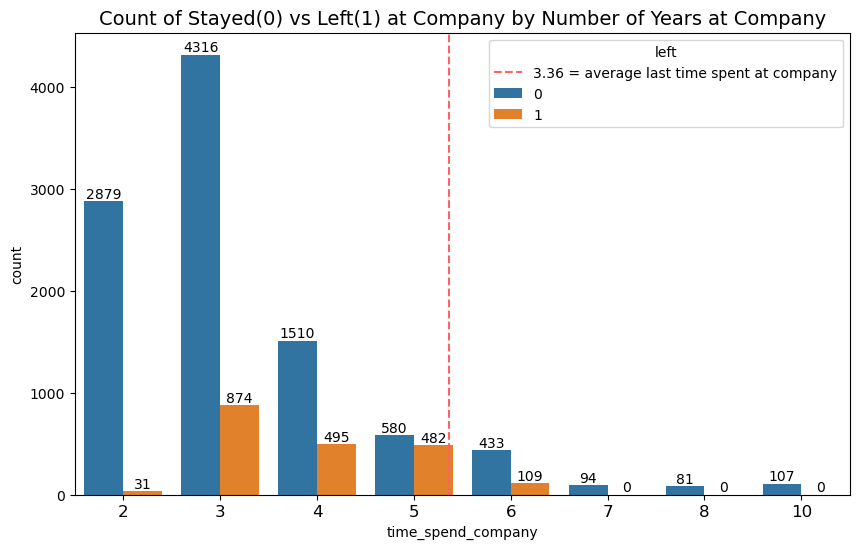

In [38]:
## FROM SubUrban and me :) ##

plt.figure(figsize=(10,6))
plt.title('Count of Stayed(0) vs Left(1) at Company by Number of Years at Company', fontsize = 14)
plt.xticks(size=12)
plt.axvline(x=3.36, color='#ff6361', label='3.36 = average last time spent at company', ls='--')
ax = sns.countplot(x='time_spend_company', hue='left', data=df1)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

#### Create plot of Stayed versus Left by the variable Last Evaluation Score

We quickly observe that the majority of employees who left fall to the left or the right of the mean Last Evaluation Score of 0.7.

Text(0.5, 1.0, 'Stayed vs Left at company by Last Evaluation Score')

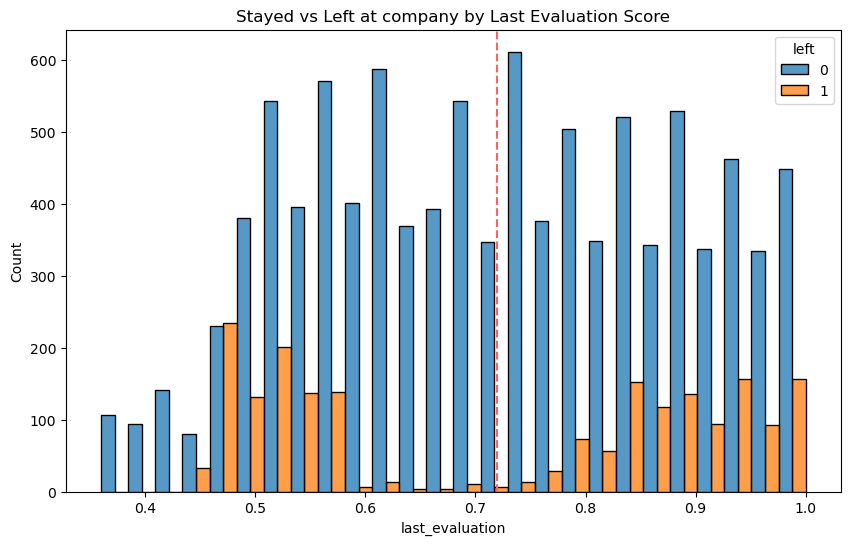

In [39]:
## FROM hari and me :) ##

plt.figure(figsize=(10,6))
sns.histplot(x = df1['last_evaluation'], hue =df1['left'], multiple = 'dodge')
plt.axvline(x=.72, color='#ff6361', label='.72 average last evaluation score', ls='--')
plt.title('Stayed vs Left at company by Last Evaluation Score')

#### Create plot of Stayed versus Left by the variable Satisfaction Level
We can easily observe that the majority of the distribution of employees who left the company falls to the left or the right of the mean Satisfaction score of 0.63.

Text(0.5, 1.0, 'Left vs Stayed at company by Satisfaction Level')

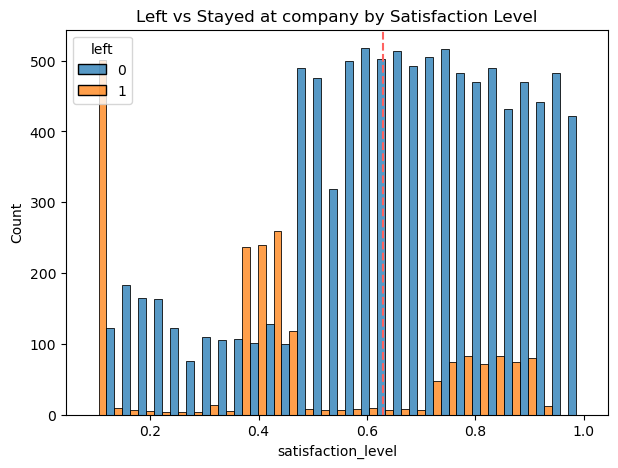

In [40]:
## FROM hari and me :) ##

plt.figure(figsize=(7,5))
sns.histplot(x = df1['satisfaction_level'], hue =df1['left'], multiple = 'dodge')
plt.axvline(x=.63, color='#ff6361', label='.63 average satisfaction score', ls='--')
plt.title('Left vs Stayed at company by Satisfaction Level')

#### Create line plot of several variables 
Another type of visualization may help us understand the variables. Line charts can help us observe the relationship of the target variable Left to independent variables like Salary or Department. There are 10 variables in this dataset and when matched in pairs of two, there are 45 possible combinations. I am creating these line charts with only two variables to keep the visualization simple. For the sake of this analysis, I will only demonstrate 12 line charts. Several charts, like Left by Salary, Satisfaction Level by Average Monthly Hours, and Satisfaction Level by Number of Projects show strong changes in their relationships. These relationships may be worth investigating further.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'sales'),
  Text(1, 0, 'accounting'),
  Text(2, 0, 'hr'),
  Text(3, 0, 'technical'),
  Text(4, 0, 'support'),
  Text(5, 0, 'management'),
  Text(6, 0, 'IT'),
  Text(7, 0, 'product_mng'),
  Text(8, 0, 'marketing'),
  Text(9, 0, 'RandD')])

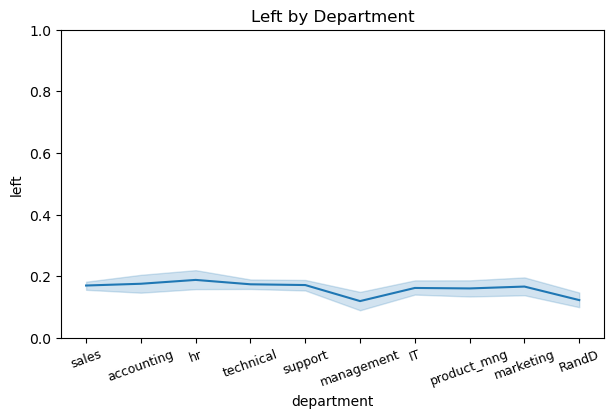

In [41]:
## FROM yosifov ##

plt.figure(figsize=(7,4))
v = sns.lineplot(x = df1['department'], y = df1['left'])
v.set_title('Left by Department')
v.set(ylim=(0, max(df1['left'])))
plt.xticks(rotation=20, size=9)


[(0.0, 1.0)]

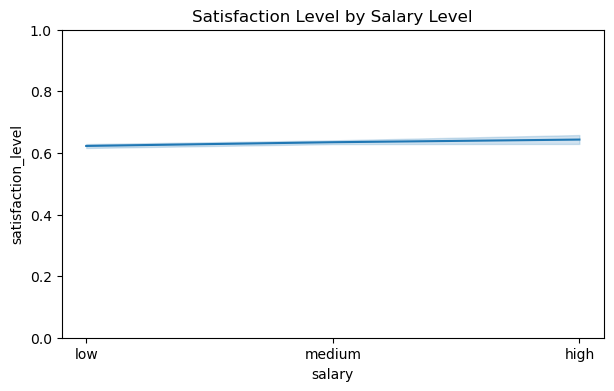

In [42]:
## FROM yosifov ##

plt.figure(figsize=(7,4))
v = sns.lineplot(x = df1['salary'], y = df1['satisfaction_level'])
v.set_title('Satisfaction Level by Salary Level')
v.set(ylim=(0, max(df1['satisfaction_level'])))

[(0.0, 1.0)]

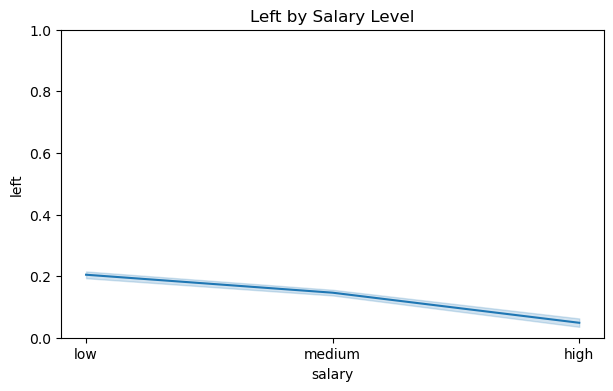

In [43]:
## FROM yosifov ##

plt.figure(figsize=(7,4))
v = sns.lineplot(x = df1['salary'], y = df1['left'])
v.set_title('Left by Salary Level')
v.set(ylim=(0, max(df1['left'])))

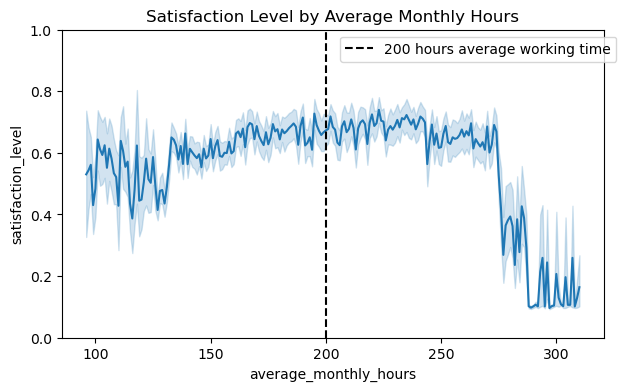

In [44]:
## FROM yosifov ##

plt.figure(figsize=(7,4))
v = sns.lineplot(x = df1['average_monthly_hours'], y = df1['satisfaction_level'])
v.set_title('Satisfaction Level by Average Monthly Hours')
v.set(ylim=(0, max(df1['satisfaction_level'])))
plt.axvline(x=200, color='black', label='200 hours average working time', ls='--')
plt.legend(loc='best', bbox_to_anchor=(0.5,0.5,0.5,0.5))

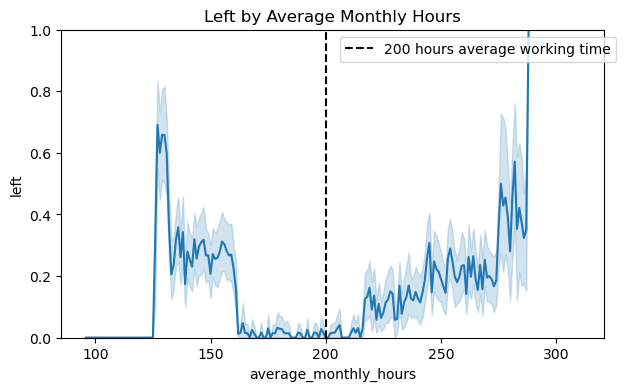

In [45]:
## FROM yosifov ##

plt.figure(figsize=(7,4))
v = sns.lineplot(x = df1['average_monthly_hours'], y = df1['left'])
v.set_title('Left by Average Monthly Hours')
v.set(ylim=(0, max(df1['left'])))
plt.axvline(x=200, color='black', label='200 hours average working time', ls='--')
plt.legend(loc='best', bbox_to_anchor=(0.5,0.5,0.5,0.5))

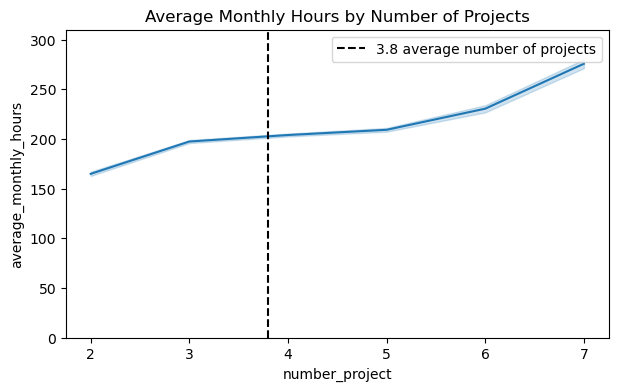

In [46]:
## FROM yosifov ##

plt.figure(figsize=(7,4))
v = sns.lineplot(x = df1['number_project'], y = df1['average_monthly_hours'])
v.set_title('Average Monthly Hours by Number of Projects')
v.set(ylim=(0, max(df1['average_monthly_hours'])))
plt.axvline(x=3.8, color='black', label='3.8 average number of projects', ls='--')
plt.legend()

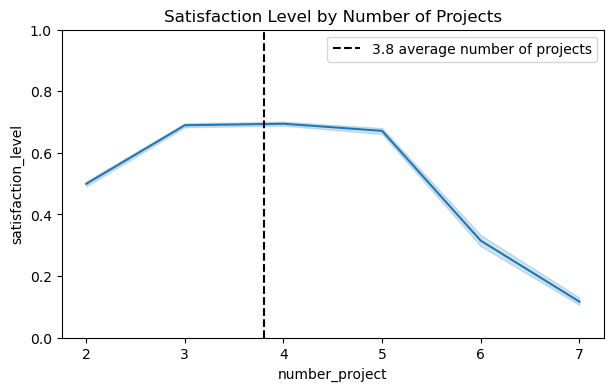

In [47]:
## FROM yosifov ##

plt.figure(figsize=(7,4))
v = sns.lineplot(x = df1['number_project'], y = df1['satisfaction_level'])
v.set_title('Satisfaction Level by Number of Projects')
v.set(ylim=(0, max(df1['satisfaction_level'])))
plt.axvline(x=3.8, color='black', label='3.8 average number of projects', ls='--')
plt.legend()

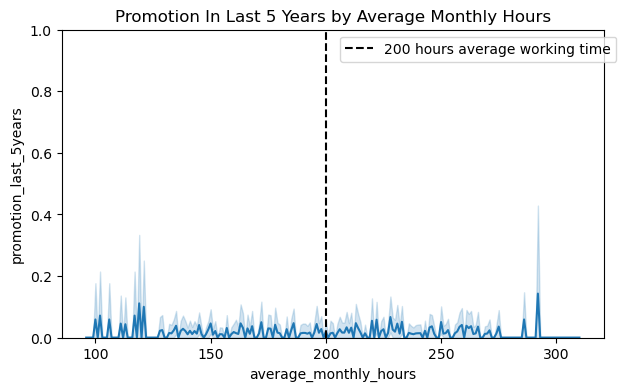

In [48]:
## FROM yosifov ##

plt.figure(figsize=(7,4))
v = sns.lineplot(x = df1['average_monthly_hours'], y = df1['promotion_last_5years'])
v.set_title('Promotion In Last 5 Years by Average Monthly Hours')
v.set(ylim=(0, max(df1['promotion_last_5years'])))
plt.axvline(x=200, color='black', label='200 hours average working time', ls='--')
plt.legend(loc='best', bbox_to_anchor=(0.5,0.5,0.5,0.5))

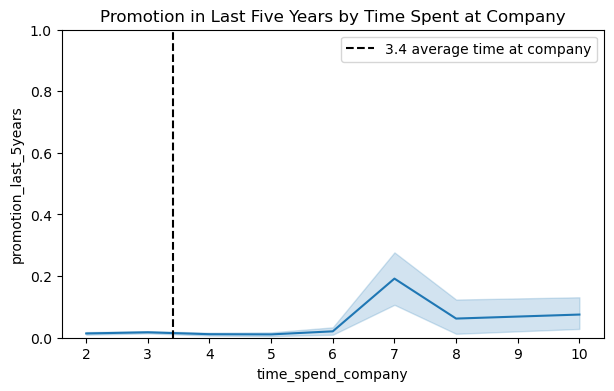

In [49]:
## FROM yosifov ##

plt.figure(figsize=(7,4))
v = sns.lineplot(x = df1['time_spend_company'], y = df1['promotion_last_5years'])
v.set_title('Promotion in Last Five Years by Time Spent at Company')
v.set(ylim=(0, max(df1['promotion_last_5years'])))
plt.axvline(x=3.4, color='black', label='3.4 average time at company', ls='--')
plt.legend()

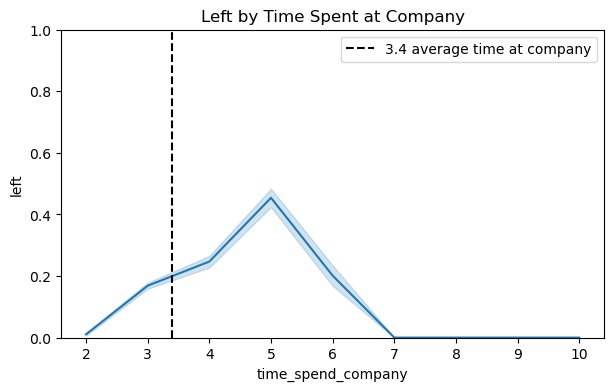

In [50]:
## FROM yosifov ##

plt.figure(figsize=(7,4))
v = sns.lineplot(x = df1['time_spend_company'], y = df1['left'])
v.set_title('Left by Time Spent at Company')
v.set(ylim=(0, max(df1['left'])))
plt.axvline(x=3.4, color='black', label='3.4 average time at company', ls='--')
plt.legend()

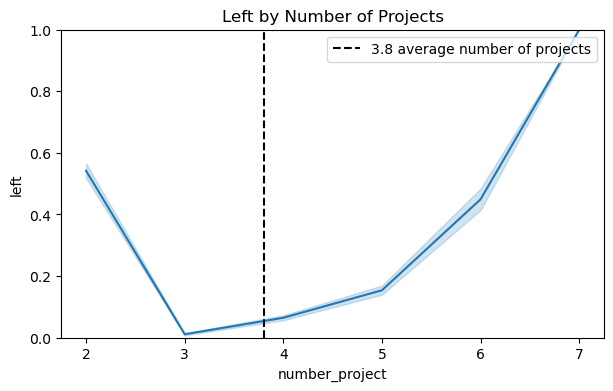

In [51]:
## FROM yosifov ##

plt.figure(figsize=(7,4))
v = sns.lineplot(x = df1['number_project'], y = df1['left'])
v.set_title('Left by Number of Projects')
v.set(ylim=(0, max(df1['left'])))
plt.axvline(x=3.8, color='black', label='3.8 average number of projects', ls='--')
plt.legend()

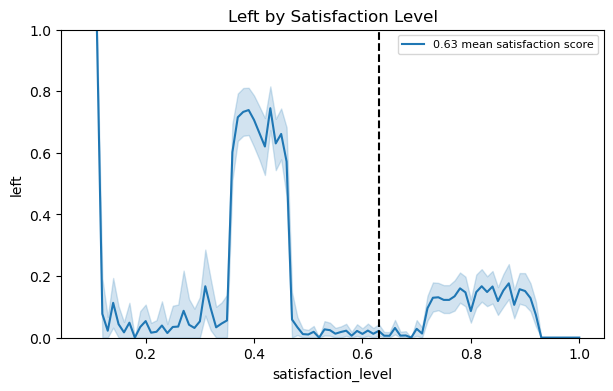

In [52]:
## FROM yosifov ##

plt.figure(figsize=(7,4))
v = sns.lineplot(x = df1['satisfaction_level'], y = df1['left'])
v.set_title('Left by Satisfaction Level')
v.set(ylim=(0, max(df1['left'])))
plt.axvline(x=.63, color='black',ls='--')
plt.legend(labels=['0.63 mean satisfaction score'],loc='upper right', bbox_to_anchor=(1,1), fontsize=8)


#### Create scatterplot of Last Evaluation score by Monthly Hours
This scatterplot shows a clear pattern of those who left the company versus stayed. A group of employees who worked around 150 hours and had a low evaluation score, and those who worked about 215 hours or more and had a high evaluation score left the company.

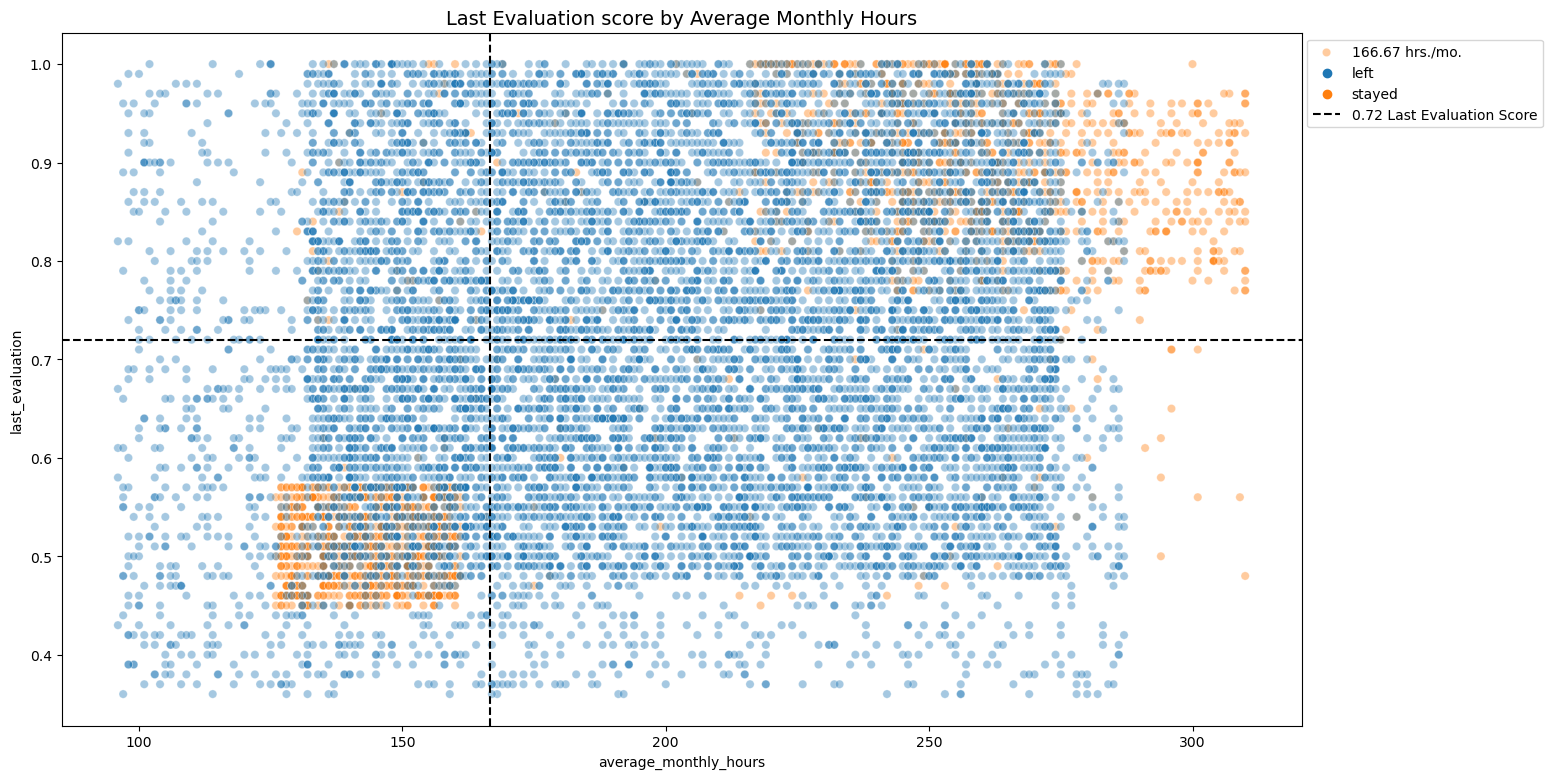

In [53]:
## FROM Coursera ##

plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='black', label='166.67 hrs./mo.', ls='--')
plt.axhline(y=0.72, color='black', label='0.72', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed', '0.72 Last Evaluation Score'], loc='upper right', bbox_to_anchor=(1.2,1))
plt.title('Last Evaluation score by Average Monthly Hours', fontsize='14');

#### Create scatterplot of Satisfaction Level by Average Monthly Hours
This scatterplot shows a clear pattern of those who left the company versus stayed. Those who worked around 150 hours and had a low Satisfaction Level, and those who worked 215 hours or more and had a Satisfaction score of around .73 and above left the company. Also observable is those who had worked around 250 hours or more and had a extremely low Satisfaction score left the company.

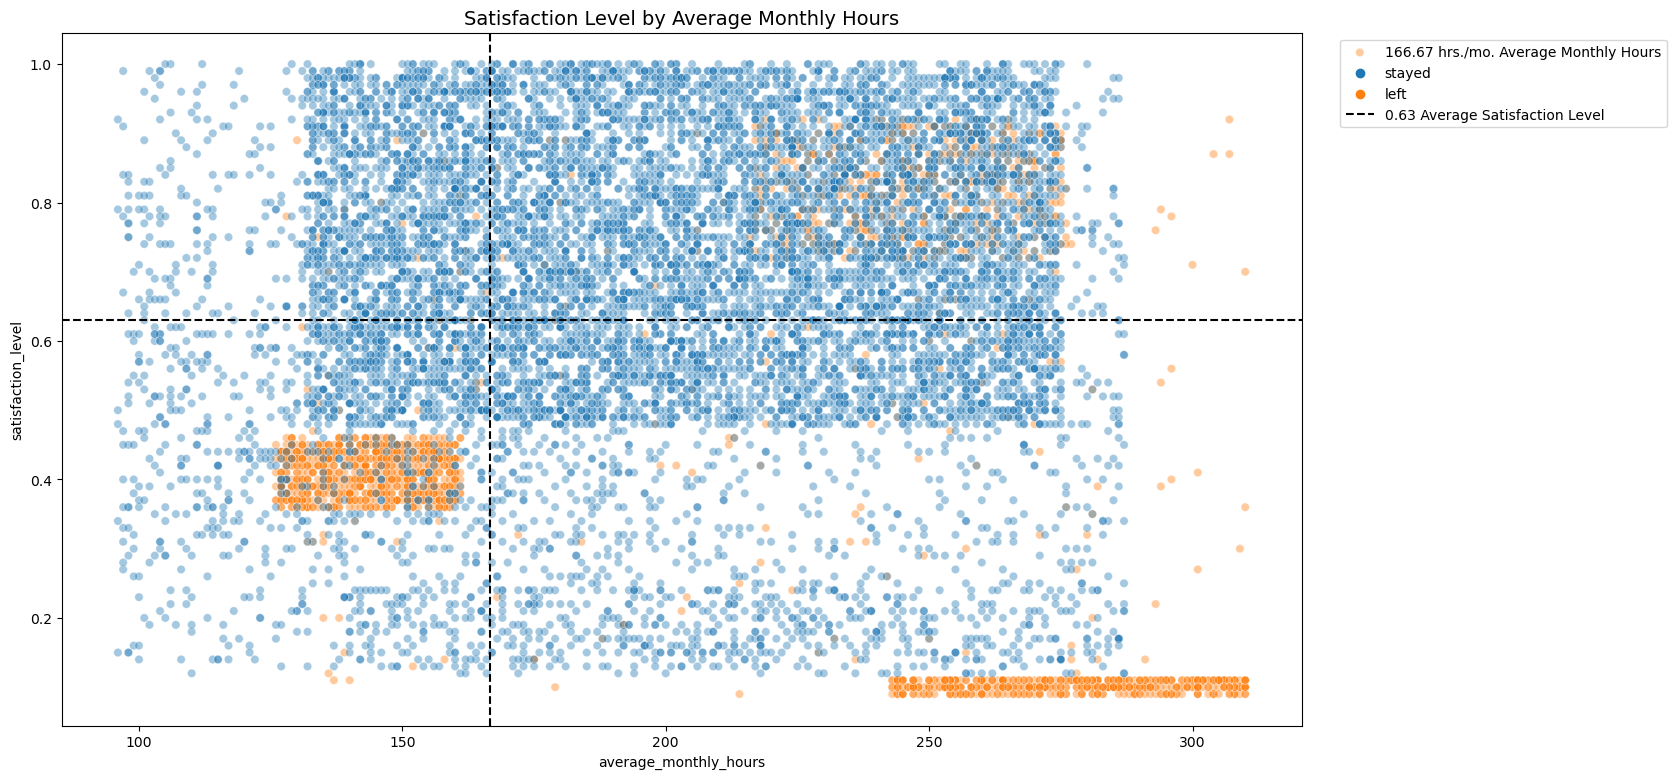

In [54]:
## FROM Coursera ##

# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='black', label='166.67 hrs./mo.', ls='--')
plt.axhline(y=0.63, color='black', ls='--')
plt.legend(labels=['166.67 hrs./mo. Average Monthly Hours', 'stayed', 'left', '0.63 Average Satisfaction Level'], loc='upper right', bbox_to_anchor=(1.3,1))
plt.title('Satisfaction Level by Average Monthly Hours', fontsize='14');

#### Create scatterplot of Satisfaction Level by Number of Projects
Creating scatterplots gives us a different look at the relationships of the variables. The charts below include categorical, and binary, and integer variables in this dataset. Looking at the charts, we see that some of them are not that useful. The most useful charts are the two scatterplots above.

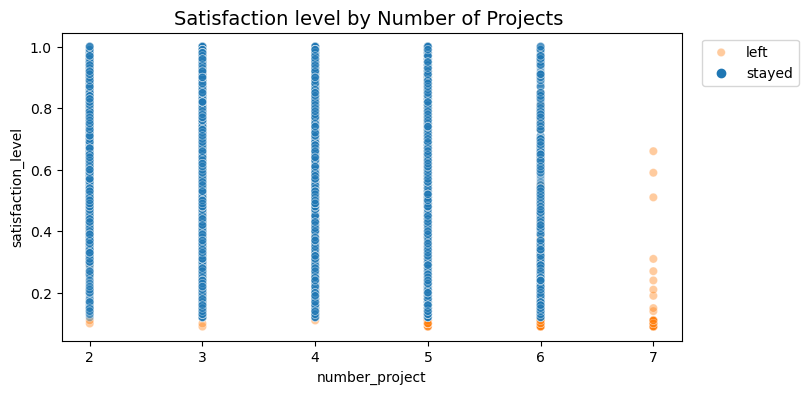

In [55]:
## FROM Coursera and me :) ##

plt.figure(figsize=(8, 4))
sns.scatterplot(data=df1, x='number_project', y='satisfaction_level', hue='left', alpha=0.4)
plt.legend(labels=['left', 'stayed'], loc='upper right',bbox_to_anchor=(1.2,1))
plt.title('Satisfaction level by Number of Projects ', fontsize='14');

#### Create scatterplot of Satisfaction Level by Time Spent at Company

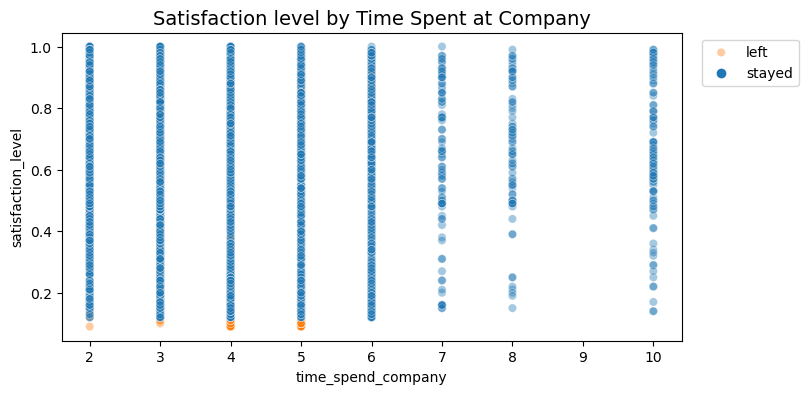

In [56]:
## FROM Coursera and me :) ##

plt.figure(figsize=(8, 4))
sns.scatterplot(data=df1, x='time_spend_company', y='satisfaction_level', hue='left', alpha=0.4)
plt.legend(labels=['left', 'stayed'],loc='upper right',bbox_to_anchor=(1.2,1))
plt.title('Satisfaction level by Time Spent at Company', fontsize='14');

#### Create scatterplot of Satisfaction Level by Work Accident

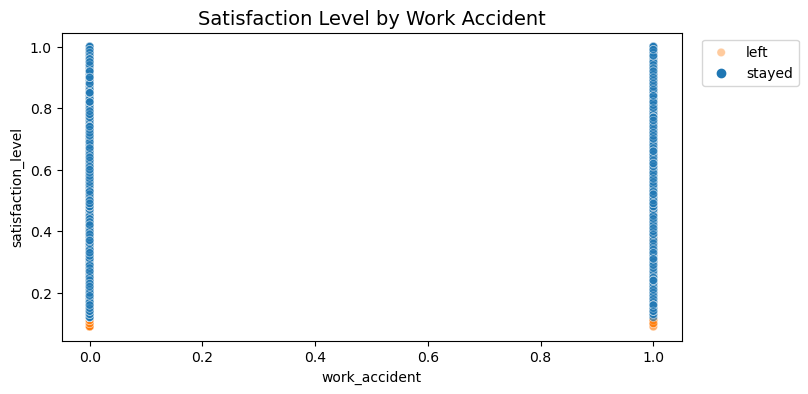

In [57]:
## FROM Coursera and me :) ##

plt.figure(figsize=(8, 4))
sns.scatterplot(data=df1, x='work_accident', y='satisfaction_level', hue='left', alpha=0.4)
plt.legend(labels=['left', 'stayed'], loc='upper right',bbox_to_anchor=(1.2,1))
plt.title('Satisfaction Level by Work Accident', fontsize='14');

#### Create scatterplot of Satisfaction Level by Leaving the Company

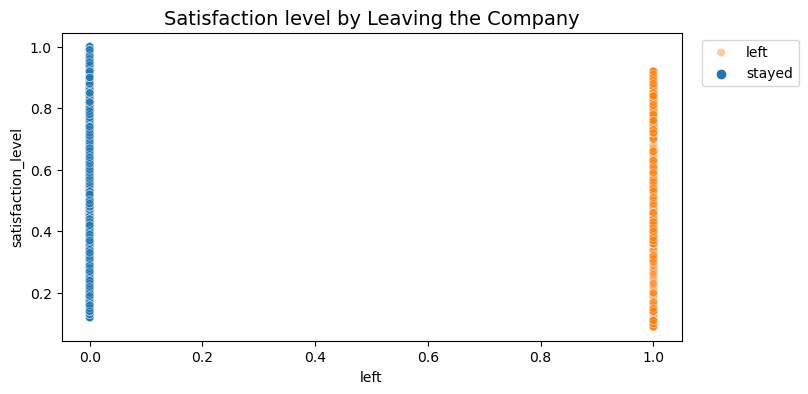

In [58]:
## FROM Coursera and me :) ##

plt.figure(figsize=(8, 4))
sns.scatterplot(data=df1, x='left', y='satisfaction_level', hue='left', alpha=0.4)
plt.legend(labels=['left', 'stayed'],loc='upper right',bbox_to_anchor=(1.2,1))
plt.title('Satisfaction level by Leaving the Company', fontsize='14');

#### Create scatterplot of Satisfaction Level by Promotion

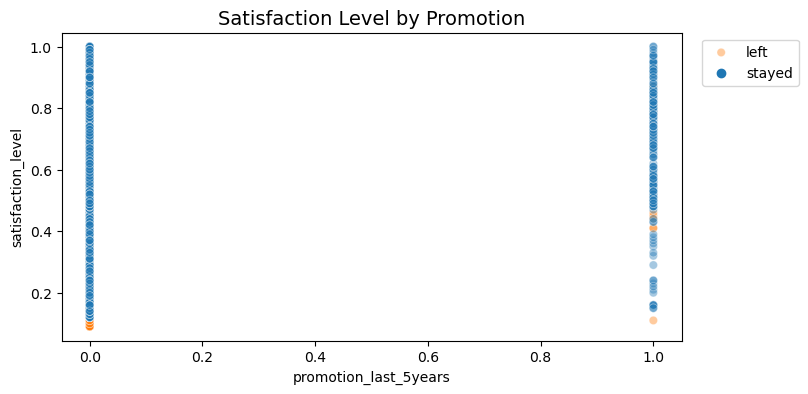

In [59]:
## FROM Coursera and me :) ##

plt.figure(figsize=(8, 4))
sns.scatterplot(data=df1, x='promotion_last_5years', y='satisfaction_level', hue='left', alpha=0.4)
plt.legend(labels=['left', 'stayed'], loc='upper right',bbox_to_anchor=(1.2,1))
plt.title('Satisfaction Level by Promotion', fontsize='14');

#### Create scatterplot of Satisfaction Level by Salary Level

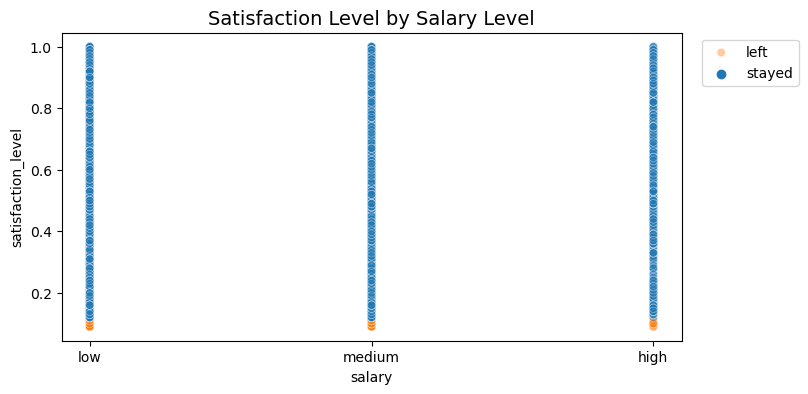

In [60]:
## FROM Coursera and me :) ##

plt.figure(figsize=(8, 4))
sns.scatterplot(data=df1, x='salary', y='satisfaction_level', hue='left', alpha=0.4)
plt.legend(labels=['left', 'stayed'], loc='upper right',bbox_to_anchor=(1.2,1))
plt.title('Satisfaction Level by Salary Level', fontsize='14');

#### Create boxplot of Average Monthly Hours by Number of Projects
Boxplots help visualize minimums, maximums, quartiles, and outliers. Grouping them by the target variable, Left, and by certain other varibables, like Number of Projects helps us see the relationships and patterns of the quartiles and outliers when compared to other variables, like Average Monthly Hours. This boxplot, for example, shows the mean Average Monthly Hours rising as Number of Projects increases for those who left the company. This observation helps us determine that those employees with both increasing Number of Projects and Average Monthly Hours are more likely to leave the company.

Text(0.5, 1.0, 'Average Monthly Hours by Number of Projects, Where 1 is Left')

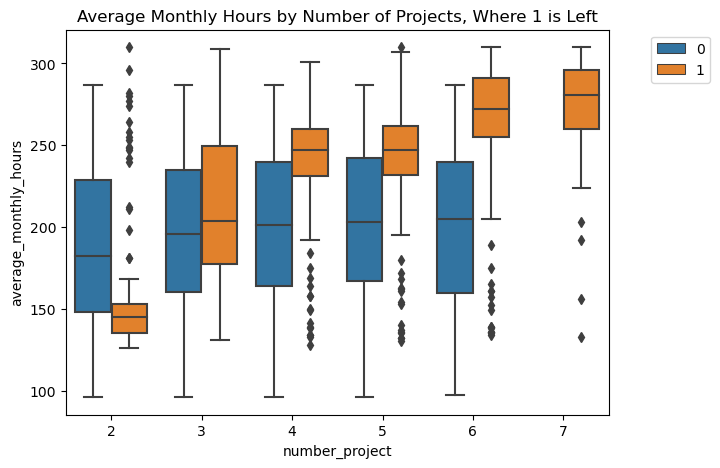

In [61]:
## FROM hari ## 

plt.figure(figsize=(7,5))
sns.boxplot(x = df1['number_project'], y = df1['average_monthly_hours'], hue =df1['left'])
plt.legend(loc='upper right',bbox_to_anchor=(1.2,1))
plt.title('Average Monthly Hours by Number of Projects, Where 1 is Left')

#### Create boxplot of Average Monthly Hours by Time Spent at Company
This boxplot helps illustrate the observation that those employees who spend less time at the company are more likely to leave. Or the opposite: those who spend more time at the company, such as 7 or more years, are less likely to leave. 

Text(0.5, 1.0, 'Average Monthly Hours by Time Spent at Company, Where 1 is Left')

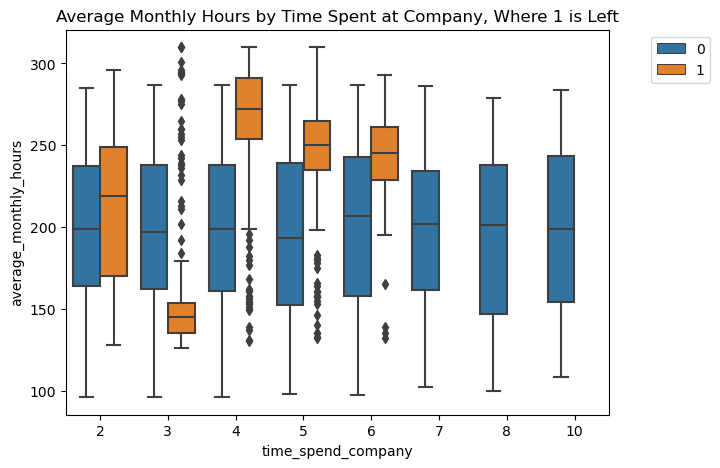

In [62]:
## FROM hari ## 

plt.figure(figsize=(7,5))
sns.boxplot(x = df1['time_spend_company'], y = df1['average_monthly_hours'], hue =df1['left'])
plt.legend(loc='upper right',bbox_to_anchor=(1.2,1))
plt.title('Average Monthly Hours by Time Spent at Company, Where 1 is Left')

#### Create boxplot of Number of Projects by Department
This boxplot is a little harder to understand quickly. We can observe that the mean number of projects is 4 for all departments except HR and Marketing. We also observe two things about the maximum of each boxplot. Of those who stayed, their maximum was 5 projects. Of those who left, the maximum was 7. For those who stayed, there is observable outliers in the project, at 6 for every department except R and D, whos maximum number of projects was 6, and had no outliers.

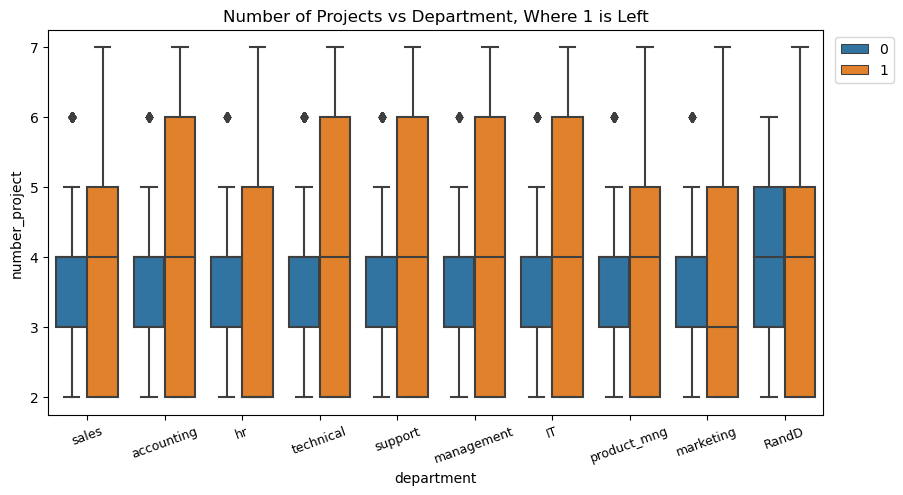

In [63]:
## FROM hari ## 

plt.figure(figsize=(10,5))
sns.boxplot(x = df1['department'], y = df1['number_project'], hue =df1['left'])
plt.title('Number of Projects vs Department, Where 1 is Left')
plt.xticks(rotation=20, size=9)
plt.legend(loc='upper right',bbox_to_anchor=(1.1,1))

#### Create Kernel Density Estimation (KDE) charts
We observe that these charts are just a different visual representation of what we saw earlier with the line charts. Those eployees who left have Satisfaction levels below 0.2, around 0.4, and around 0.8. We also observe that those employees who left had Last Evaluation scores around 0.5 and 0.9. Lastly, we obvserve that the employees who left had 2 projects, and increased again at 6 projects.

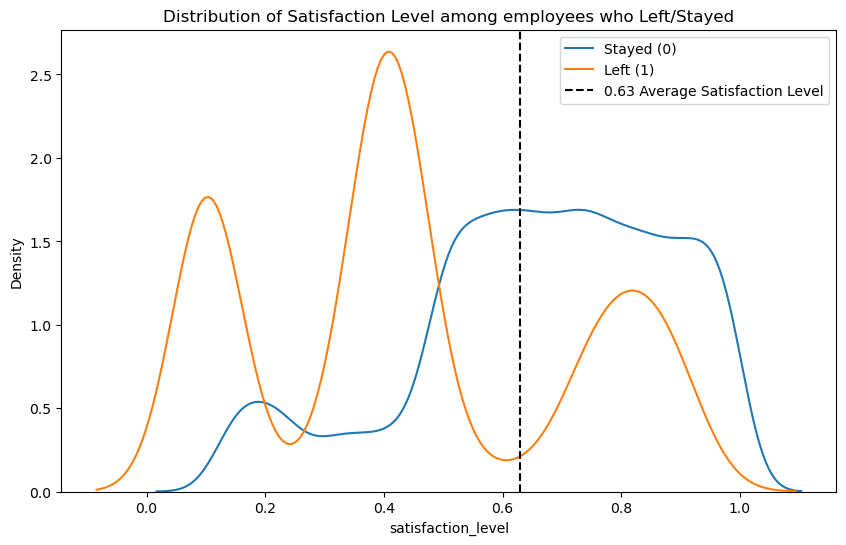

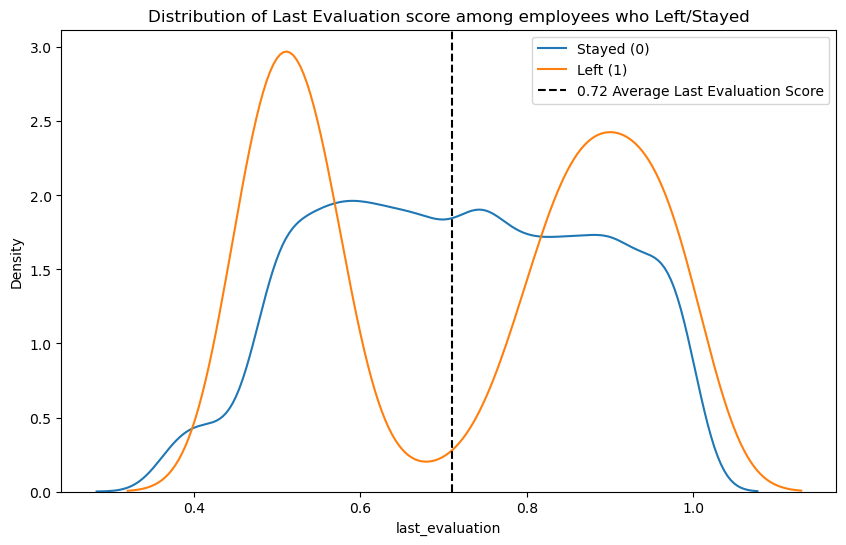

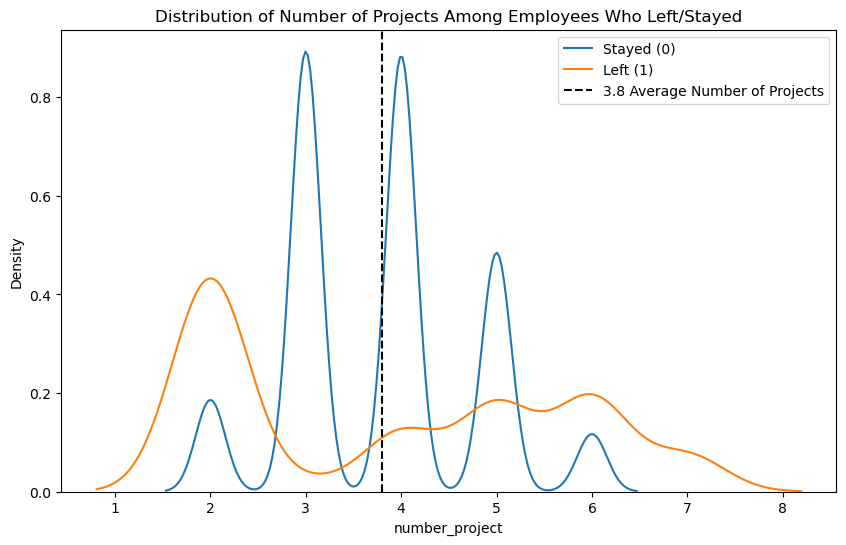

In [64]:
## FROM SubUrban ##

# continuous variables #
# For satisfaction_level
plt.figure(figsize=(10,6))
sns.kdeplot(df1.loc[df1['left'] == 0, 'satisfaction_level'], label='Stayed (0)')
sns.kdeplot(df1.loc[df1['left'] == 1, 'satisfaction_level'], label='Left (1)')
plt.legend(labels=['stayed', 'left'])
plt.axvline(x=0.63, color='black', label='0.63 Average Satisfaction Level', ls='--')
plt.legend(loc='best', bbox_to_anchor=(0.5,0.5,0.5,0.5))
plt.title('Distribution of Satisfaction Level among employees who Left/Stayed')
plt.show()

# For last_evaluation
plt.figure(figsize=(10,6))
sns.kdeplot(df1.loc[df1['left'] == 0, 'last_evaluation'], label='Stayed (0)')
sns.kdeplot(df1.loc[df1['left'] == 1, 'last_evaluation'], label='Left (1)')
plt.legend(labels=['stayed', 'left'])
plt.title('Distribution of Last Evaluation score among employees who Left/Stayed')
plt.axvline(x=0.71, color='black', label='0.72 Average Last Evaluation Score', ls='--')
plt.legend(loc='best', bbox_to_anchor=(0.5,0.5,0.5,0.5))
plt.show()

# For number_projects
plt.figure(figsize=(10,6))
sns.kdeplot(df1.loc[df1['left'] == 0, 'number_project'], label='Stayed (0)')
sns.kdeplot(df1.loc[df1['left'] == 1, 'number_project'], label='Left (1)')
plt.legend(labels=['stayed', 'left'])
plt.axvline(x=3.8, color='black', label='3.8 Average Number of Projects', ls='--')
plt.legend(loc='best', bbox_to_anchor=(0.5,0.5,0.5,0.5))
plt.title('Distribution of Number of Projects Among Employees Who Left/Stayed')
plt.show()

#### Create list of correlation values to the target variable, Left.
The strongest correlation with the target varialbe Left is Time Spent at Company, with a value of 0.17. The strongest negative linear correlation with the target variable Left is Satisfaction Level, with a value of -0.35. This suggests that an employee with a lower satisfaction level is more likely to leave the company.

In [65]:
## FROM Dennis ##

df1.corr()["left"].sort_values()

/var/folders/vv/f9ns_7yj5zd7jj24xfc7kks40000gn/T/ipykernel_91540/140811141.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()["left"].sort_values()


satisfaction_level      -0.350558
work_accident           -0.125436
promotion_last_5years   -0.044657
last_evaluation          0.013520
number_project           0.030928
average_monthly_hours    0.070409
time_spend_company       0.173295
left                     1.000000
Name: left, dtype: float64

#### Create a visualization of the correlations
This table quickly shows the correlations between variables. Rectangles with red coloring and avalue of 1.0 indicate a perfect positive linear relationship between the two variables. For example, the target variable Left has a 1.0 correlation value with itself. The variable Last Evaluation with the target variable Left has a correlation variable of 0.01, a weak positive linear relationship. This table displays values for all correlations for the 10 variables. Now that we know the strongest positve linear correlation with the target variable Left is Time Spent at Company with a value of 0.17, it may be worth taking note of as I create the logistic regression and maching learning models and review their performance.

/var/folders/vv/f9ns_7yj5zd7jj24xfc7kks40000gn/T/ipykernel_91540/98314361.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)


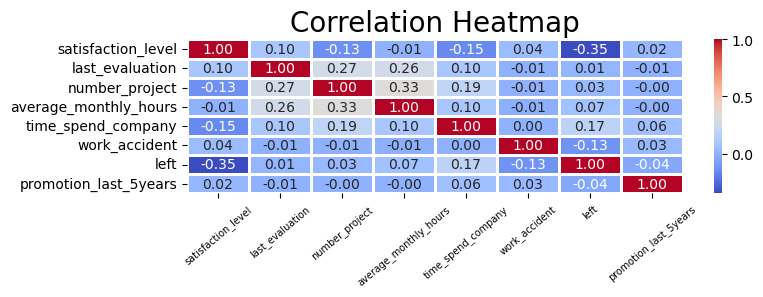

In [66]:
## FROM dennis ##

plt.figure(figsize=(8,2))
sns.heatmap(df1.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.xticks(rotation=40, size=7)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

#### Review the shape of the dataset to re-familiarize before creating the summary of findings and observations

In [67]:
## FROM me :) 

df1.shape

(11991, 10)

#### Review the data types of the variables to re-familiarize before creating the summary of findings and observations

In [68]:
## FROM me :) ##

df1.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
time_spend_company         int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

#### Create pairplot pairings visualization
This function created 64 (8x8) charts. This function does not use categorical (datatype = object) variables when creating pairplots. This quick visual can help us quickly identify any trends or relationships between variables.

<Figure size 800x200 with 0 Axes>

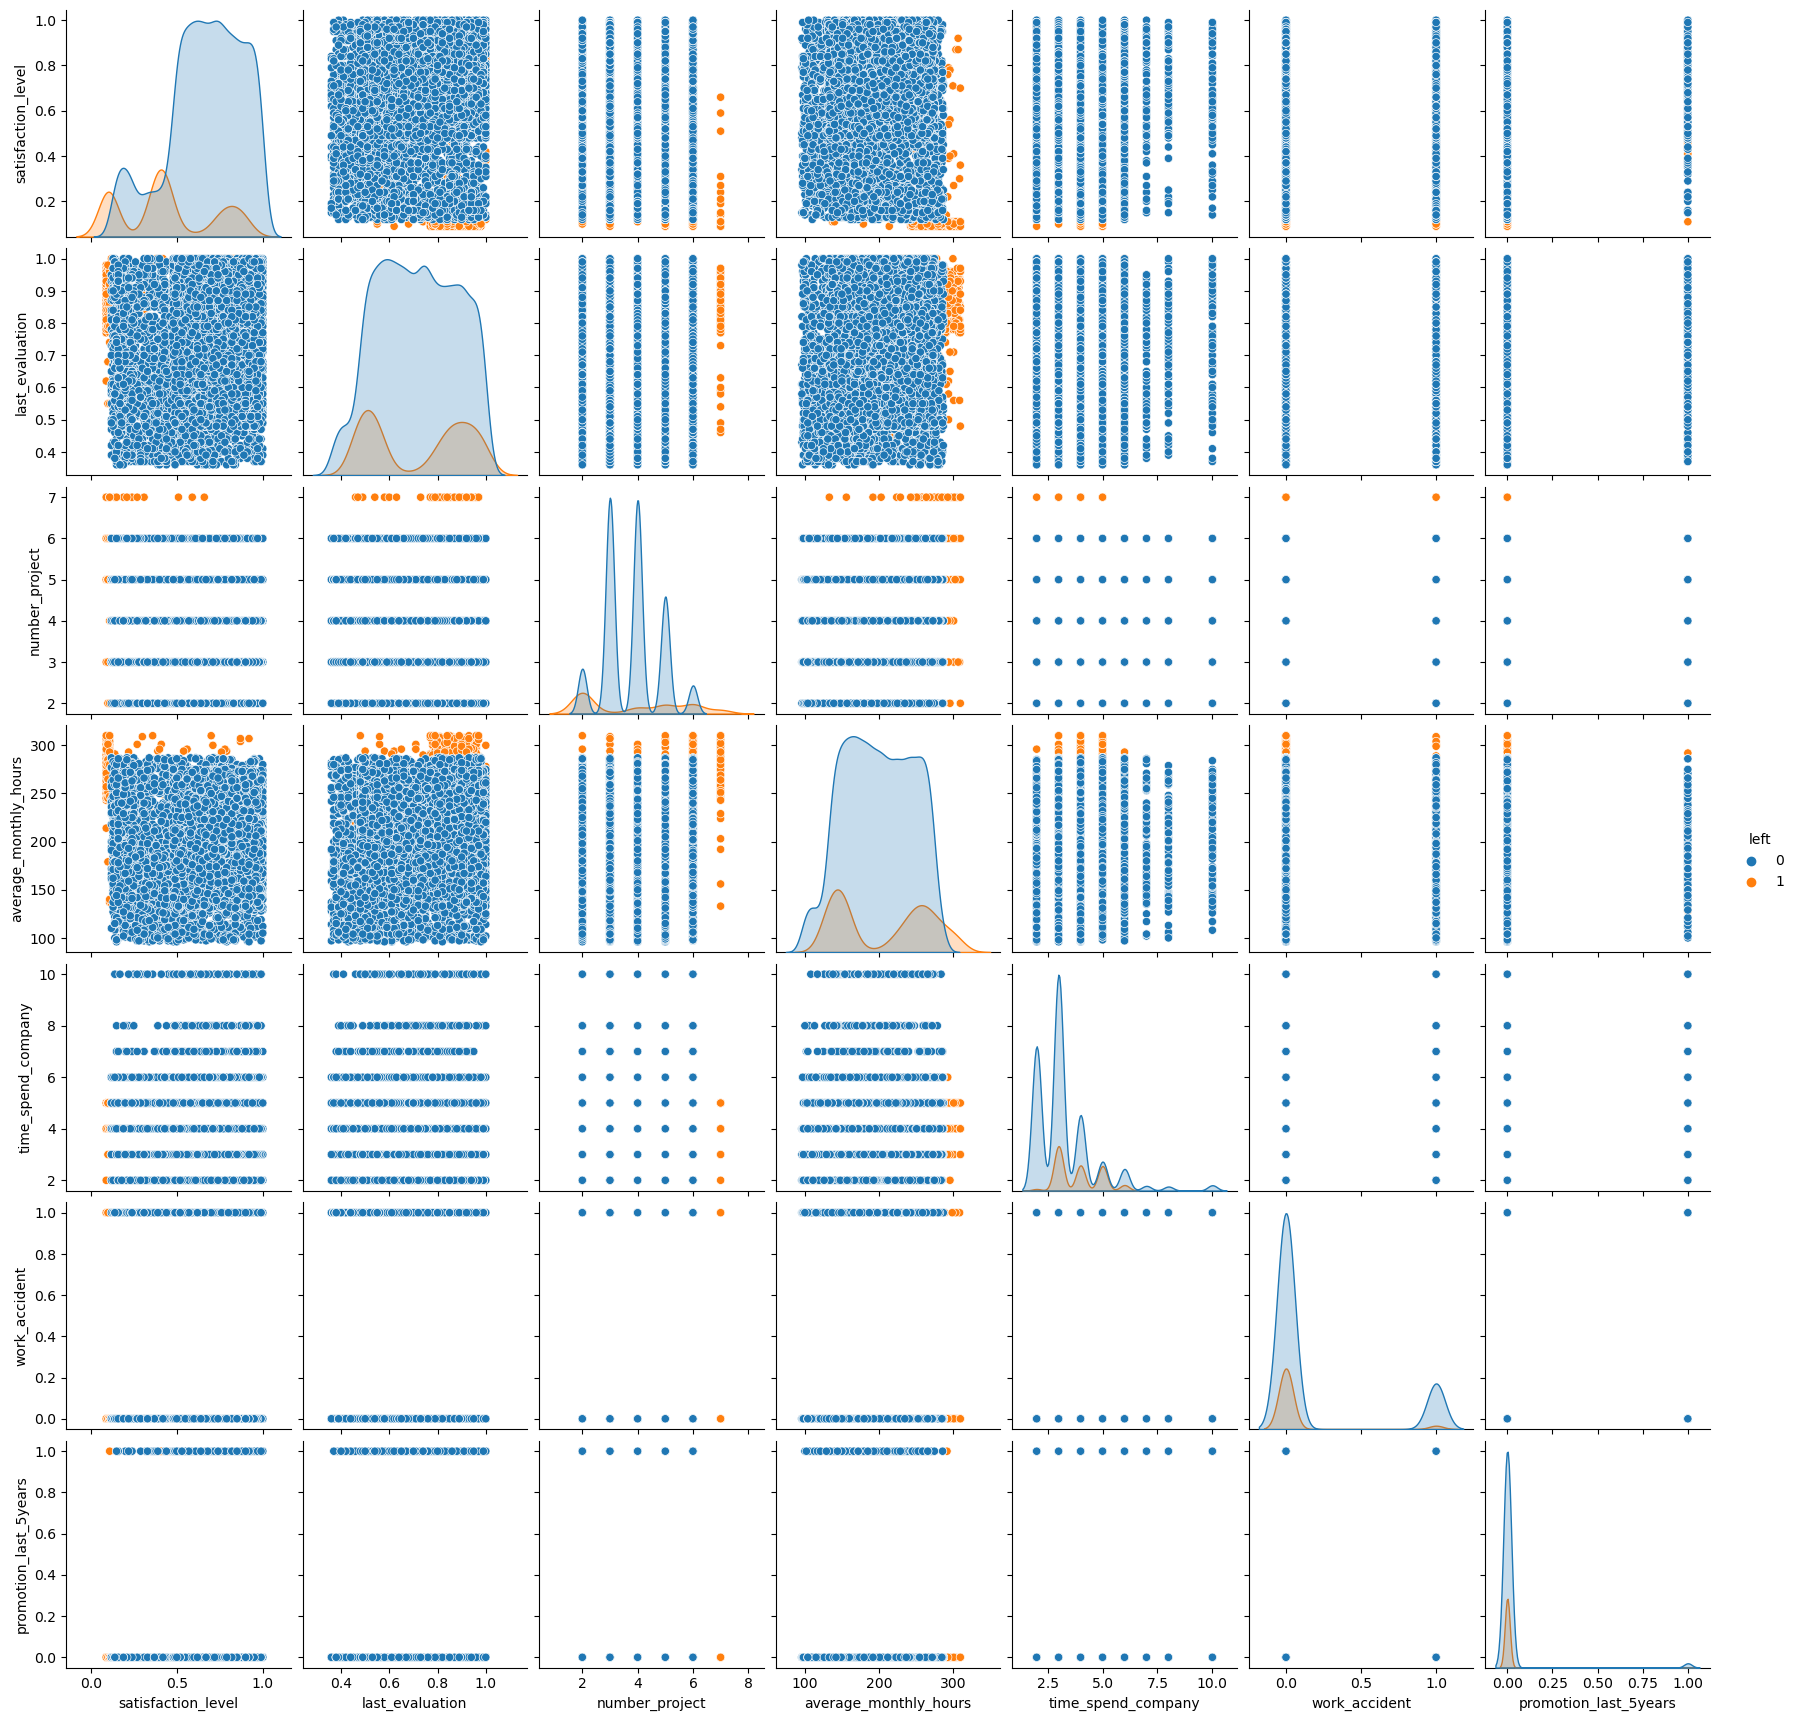

In [69]:
## FROM me :) ##
plt.figure(figsize=(8,2))
sns.pairplot(df1,hue='left')

### Data Analysis summary and findings

### Questions I reflected on as I completed the analyze stage:

What did I observe about the relationships between variables?
- Several relationships stood out during the analysis. The relationship that stood out the most was the relationship between Satisfaction Score and Left. This correlation was -0.35, meaning it had a negative linear correlation. The next strongest correlation between the target variable Left was Time Spent at Company, with a value of 0.17. This is half of the strongest correlation value. It is noteworthy because the next highest is Work Accident at 0.15. With most variables having such a low correlation with the target variable, this indicates most variables do not have a large impact on the target variable.

What did I observe about the distributions in the data?
- Most distributions were not normal, with only the variable Number of Projects having a relatively normal distrubtion. Seven other variables had skewed distribtuions.

What transformations did I make with my data? Why did I chose to make those decisions?
- At this stage no variables were transformed. The datatypes were able to be analyzed in a basic manner without manipulations or transformations. Manipulations or transformations may be needed during the logistic regression and machine learning model construction phase.

What are some purposes of EDA before constructing a predictive model?
- Exploratory Data Analysis was needed to ensure a clean dataset. This dataset had 3008 duplicates. Ensuring duplicates do not influence the base statistics and calculations is required to retain the integrity of the findings.

Do I have any ethical considerations in this stage?
- Anytime data is used to predict behavior or imply future decisions should be carefully guarded and used. Privacy and Confidentiality should be secured in the form of securly stored data and restricted access with securing measures in place. Encryption could also be considered to protect sensitive employee information. If possible, anonymyzation should be used to protect the identity of the employee to help protect their privacy. Informed consent should also be given by the employee to the company if this data is used in a deployed model. When sensitive data like Last Evaluation scores or Salary level is used in decision making, careful consideration should be excercised to ensure fairness and eliminate bias towards a group or person. Bias detection should be deployed to ensure that the machine learning model does not reinforce existing biases or create ntew ones. Bias and descrimination in the form of gender, race, age, or other protected characteristics should be reviewed and eliminated. Fair algorithms should be used, and and conducting regular audits to detect and mitigate bias should happen on a determined basis. This helps ensure the model is equitable for all employees. This model should also have a purpose limitation. The data used in the model should be strictly used for the pupose stated to the employees. A clearly defined limit and scope of the deployed models should be determined to avoid mission creep of the model and the accompanying analyses. Accountability should be determined regarding how the the data is used and decisions made by the models. Assiging responsibility to a data government team or ethics committe should be considered. Regular audits and transparent data reports on how data is used, model performance, and any issues regarding ethics and fairness should be considered. Human oversight should be considered if the models' decisions are used to determine any promotions, salary adjustments, or terminations.  Channels for employees to give feedback or to contest decisions influenced or determined by the models should be considered. Processes and mechanisms to address such concerns should be considered. Maintaining trust in the model's decisions by developing Explainable AI should be considered. Clearly communicating the models' methods, what data it uses, and how its outputs are interpreted and applied in decision-making processes should be considered. Adherence to any company policies and any and all Legal compliances like General Data Protection Regulation (GDPR) or the California Consumer Privacy Act (CCPA), and any other local laws governing employee data storage, use, dissemintion, etc. should be considered.

While this analysis was exhaustive, it yielded several useful observations. I will present a few basic statistics and observations.
##### Summary
- There are 10 variables in this dataset, with the target variable as Left. Left is a binary variable and  represented in the column with a 1. If the Left observation is 0, the employee stayed at the company.
- In this dataset 10,000 empoyees stayed (83%); 1,991 left (17%).
- There were 4,868 instances of outliers; The left variable had 1,991, which we can disregard since this variable is binary.
- The largest Department that had employees who left was Sales at 550; The lowest Department was Management at 52.
- The mean number of projects was 4. The total of those who left with 4 or more projects assigned was 1096. Those employees who left who had below the mean of 4 projects or less was 1132. This is a difference of 36.
- We observed in a scatterplot of Average Monthly Work Hours and Last Evaluation score a group of employees who worked around 150 hours and had a low evaluation score, and those who worked about 215 hours or more and had a high evaluation score left the company.
- Also observed in a scatterplot of Average Monthly Work Hours and Satisfaction Level that those who worked around 150 hours and had a low Satisfaction Level, and those who worked 215 hours or more and had a Satisfaction score of around .73 and above left the company. Also observable is those who had worked around 250 hours or more and had a extremely low Satisfaction score left the company.
- The strongest correlation between the target variable Left and another variable is the variable Satisfaction Level, which is negatively linearly correlated at -0.35. The strongest positively linearly correlated variable is Time Spent at Company, with a value of 0.17. As this variable Time Spent at Company is half of the next strongest correlated varable Satisfaction Level, it is notable to review this correlation and others during the summary of the models' performance.

##### Insights
It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, having over 6 assigned projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that employees who have spent more than six years at the company tend not to leave. This could mean certain employees are somehow immune to the previously mentioned burnout. We observed earlier that Management and Research and Development employees tend not to leave compared to other departments. These observations imply that those who do not leave are in these specific departments that are insulated from receiving low evaluation scores, being assigned a large number of projects, and working fewer hours than the majority of the company.

When correlations between variables are examined, we see that the strongest correlation to the target variable Left is Satisfaction Level at -0.35. The next highest is Time Spent at Company at 0.17. With these variables and values in mind, we can look for these variables in the performance analysis of the logistic regression and machine learning models. 

##### Recommendations
- Because Employee Satisfaction Level had the highest negative correlation with the target variable Left, it should be investigated by Leadership to determine why Satisfaction Level is low. Low Satisfaction Level has a negative impact on employee morale. Shoring up this aspect of an employee's morale will help reduce the likelihood of an employee leaving the company.
- Exploring the possibility of putting a maximum of assigned projects. A high number of projects coupled with a high number of working hours is a recipe for an employee to leave.
- Exploring the possibility of putting a maximum number of working hours in a month. A high number of monthly working hours coupled with a high number of projects will encourage an employee to leave the company.
- In the current conditions, the longer an employee stays at the company, the less likely they will leave. Exploring ways to incentivize an employee to stay at the company longer will help reduce employee turnover.

I now move to the Construct Stage where I will prepare and create a logistic regression model, two decision tree models, and two random forest models.

# **paCe: Construct Stage**

### 1. Determine which models are most appropriate:

The goal is to predict whether an employee leaves the company, which is a categorical outcome variable. Since this is a classification task, specifically a binary classification, where the outcome variable left can be either a 1 (indicating employee left company) or 0 (employee did not leave company), the prediction task is to classify the outcome. Note that binomial logistic regression suits the task because it involves binary classification. Decision Tree and Random Forest models are also a relevant model as they are good at predicting a binary outcome.

### 2. Construct the models

### 3. Recall model assumptions:

Logistic Regression model assumptions

- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size

Decision Tree model assumptions
- Assumption of Recursive Partitioning
- Feature Independence
- Sufficient Data
- Quality of Splits
- Data Consistency
- Handling of Missing Values
- Overfitting Control

Practical Considerations:
- Choosing the right depth
- Minimum samples for Splits and Leafs
- Impurity Reduction Critera such as Gini Impurity, Entropy, and Variance


Random Forest model assumptions
- Independence of Trees
- Boostrap Sampling
- Random Feature Selection
- Sufficient Data
- Feature Importance
- Handling Missing Values
- Correlation and Multicollinearity

Practical Considerations
- Number of Trees
- Tree depth and complexity
- Randomness Control
- Out-of-bag Error

### 4. Evaluate model results to determine how well the model fits the data

- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the models performance



### Reflecting on these questions as I complete the constructing stage:

- Do I notice anything odd?
- Which independent variables did I choose for the model and why?
- Are each of the assumptions met?
- How well does my model fit the data?

## Modeling Approach A: Binomial Logistic Regression
This approach covers a binomial logistic regression model.

### Create new copy of dataframe and encode Salary variable from categorical to numerical using get_dummies function
Because a binomial logistic regression model provides a great baseline for prediction with this type of variable datatype, I will prepare our dataset to build a logistic regression model. I will first copy the dataframe into a new one to preserve the original. Then I will encode the Salary variable with a value of 0, 1, or 2. 0 will represent a "Low" salary value, 1 will represent a "Medium" salary value, and 2 will represent a "High" salary value. This was done because Salary originally was a categorical variable type, and is hierarchical in nature. Encoding with a 0, 1, or 2 helps preserve the value and hierarchy but prepares this variable for the binomial logistic regression model.

In [70]:
## FROM Coursera ##

# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head(10)

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   
6                0.10             0.77               6                    247   
7                0.92             0.85               5                    259   
8                0.89             1.00               5                    224   
9                0.42             0.53               2                    142   

   time_spend_company  work_accident  left  promotion_last_5years  salary  \
0                   3              0     1                      0       0   
1                   6              0     1                      0       1   
2                   4              0     1                      0       1   
3                   5              0     1                      0       0   
4                   3              0     1                      0       0   
5                   3              0     1                      0       0   
6                   4              0     1                      0       0   
7                   5              0     1                      0       0   
8                   5              0     1                      0       0   
9                   3              0     1                      0       0   

   department_IT  department_RandD  department_accounting  department_hr  \
0              0                 0                      0              0   
1              0                 0                      0              0   
2              0                 0                      0              0   
3              0                 0                      0              0   
4              0                 0                      0              0   
5              0                 0                      0              0   
6              0                 0                      0              0   
7              0                 0                      0              0   
8              0                 0                      0              0   
9              0                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   
6                      0                     0                       0   
7                      0                     0                       0   
8                      0                     0                       0   
9                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0  
5                 1                   0                     0  
6                 1                   0                     0  
7                 1                   0                     0  
8                 1                

### Construct a new heatmap to visualize correlations after encoding Salary variable
We now see that Salary is negatively correlated with the target variable Left with a value -0.12. While not insignificant, this is a weak correlation.

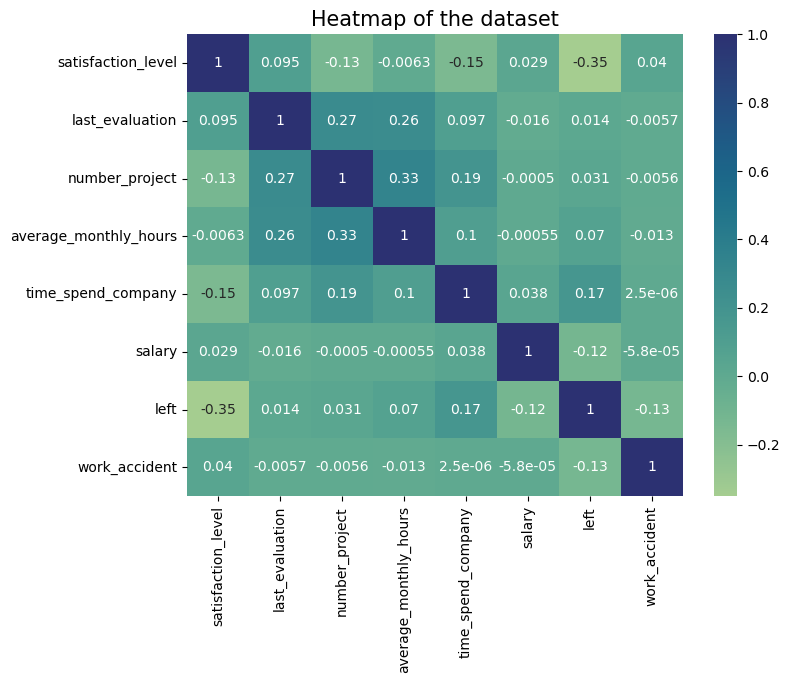

In [71]:
## FROM Coursera ## 

# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company', 'salary', 'left', 'work_accident']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset', fontsize=15)
plt.show()

### Create new dataframe with outliers removed from the variable Time Spend Company

Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the time_spend_company column that were identified earlier. It had 824 outliers.


In [72]:
## FROM Coursera 
# Determine the number of rows containing outliers 

# Compute the 25th percentile value in `tenure`
percentile25 = df1['time_spend_company'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['time_spend_company'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['time_spend_company'] > upper_limit) | (df1['time_spend_company'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `time_spend_company`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `time_spend_company`: 824


In [73]:
## FROM Coursera ##

# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['time_spend_company'] >= lower_limit) & (df_enc['time_spend_company'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head(5)

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   time_spend_company  work_accident  left  promotion_last_5years  salary  \
0                   3              0     1                      0       0   
2                   4              0     1                      0       1   
3                   5              0     1                      0       0   
4                   3              0     1                      0       0   
5                   3              0     1                      0       0   

   department_IT  department_RandD  department_accounting  department_hr  \
0              0                 0                      0              0   
2              0                 0                      0              0   
3              0                 0                      0              0   
4              0                 0                      0              0   
5              0                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0  
5                 1                   0                     0

### Create a variable, Y, by isolating the target variable Left from the above dataset
We want to isolate the Left variable from the dataset to be able to create and run the logistic regression model.

In [74]:
## FROM Coursera ##

# Isolate the outcome variable
y = df_logreg['left']

# Display first few rows of the outcome variable
y.head(5) 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

### Create a variable, X, by isolating all variables except the target variable, Left, and create a new dataset
Making a datset that does not contain the target variable, Left, is the next step in the construction of the logistic regression model.

In [75]:
## FROM Coursera ## 

# Select the features you want to use in your model
X = df_logreg.drop('left', axis=1)

# Display the first few rows of the selected features 
X.head(5)

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   time_spend_company  work_accident  promotion_last_5years  salary  \
0                   3              0                      0       0   
2                   4              0                      0       1   
3                   5              0                      0       0   
4                   3              0                      0       0   
5                   3              0                      0       0   

   department_IT  department_RandD  department_accounting  department_hr  \
0              0                 0                      0              0   
2              0                 0                      0              0   
3              0                 0                      0              0   
4              0                 0                      0              0   
5              0                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0  
5                 1                   0                     0

### Splitting data into training and testing sets
Here I will split the data into training and testing data. I will use this data to train the model and then test it to analyze its performance.

In [76]:
## FROM Coursera ##

# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

### Construct the logistic regression model
Now I will construct the logistic regression model with 500 iterations using the training data.

In [77]:
## FROM Coursera ##

# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

### Create the Y variable prediction from the X_test dataset

In [78]:
## FROM Coursera ##

# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

### Create a confusion matrix visualization to reveal counts of True Negatives, True Positives, False Negatives, and False Positives
Display a confusion matrix of the logistic regression model

The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right quadrant displays the number of true positives. True negatives: The number of people who did not leave that the model accurately predicted did not leave. False positives: The number of people who did not leave the model inaccurately predicted as leaving. False negatives: The number of people who left that the model inaccurately predicted did not leave True positives: The number of people who left the model accurately predicted as leaving A perfect model would yield all true negatives and true positives, and no false negatives or false positives. Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model. Check the class balance in the data. In other words, check the value counts in the left column. Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics. The class balance is 83% stayed, and 17% left.

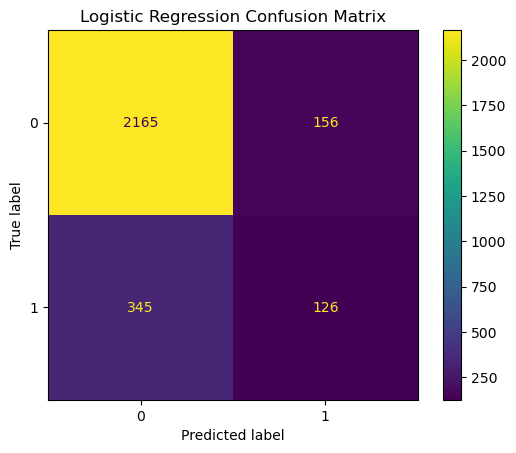

In [79]:
## FROM Coursera ##

# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')
plt.title('Logistic Regression Confusion Matrix')

# Display plot
plt.show()

### Calculate value counts of the logistic regression dataset

There is an approximately 83%-17% split. So the data is not perfectly balanced, but it is not too imbalanced. If it was more severely imbalanced, I might want to resample the data to make it more balanced. In this case, I can use this data without modifying the class balance and continue evaluating the model.

In [80]:
## FROM Coursera ##

df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

### Create classification report of the logistic regression model

The classification report below shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

In [81]:
## FROM Coursera ##

# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
lr_report = classification_report(y_test, y_pred, target_names=target_names)
print(lr_report)

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.45      0.27      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.62      2792
             weighted avg       0.79      0.82      0.80      2792



### Create table of logistic regression coefficients
The table displays the different coefficient values, of all variables and all Departments. We see the largest negative coefficient is satisfaction_level with a score of -4.393. The next highest is work_accident with a score of -1.506. The largest positive coefficient is time_spend_company with a score of 1.097. This means as the predictor variable satisfaction_level increases, the likelihood of the target variable Left happening, meaning the employee leaves, decreases. With these stark difference in coefficient values, the variable satisfaction_level will be examined further during the model building and the accompanying performance analysis. 

In [82]:
# Get the coefficients
coefficients = log_clf.coef_[0]
features = X.columns

# Create a DataFrame for visualization
coeff_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print(coeff_df)


                   Feature  Coefficient
4       time_spend_company     1.097791
17    department_technical     0.032224
16      department_support     0.022731
15        department_sales     0.020208
3    average_monthly_hours     0.003607
11           department_hr    -0.013650
1          last_evaluation    -0.026038
14  department_product_mng    -0.100524
13    department_marketing    -0.113391
8            department_IT    -0.136453
12   department_management    -0.206607
10   department_accounting    -0.267809
9         department_RandD    -0.310745
2           number_project    -0.490677
7                   salary    -0.526459
6    promotion_last_5years    -0.832042
5            work_accident    -1.506494
0       satisfaction_level    -4.393119


### Create barchart visualization of coefficient values of logistic regression model

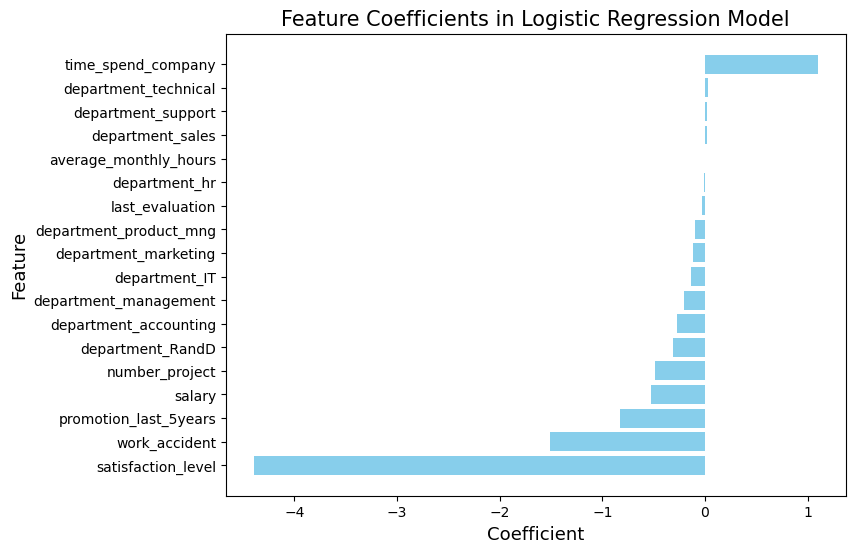

In [83]:
# Plot the coefficients
plt.figure(figsize=(8, 6))
plt.barh(coeff_df['Feature'], coeff_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient', fontsize=13)
plt.ylabel('Feature', fontsize=13)
plt.title('Feature Coefficients in Logistic Regression Model', fontsize=15)
plt.gca().invert_yaxis()  # To display the highest coefficient at the top
plt.show()


## Modeling Approach B: Tree-based Model

This approach covers implementation of Decision Tree and Random Forest. I will first create a Decision Tree model.

### Create a variable, Y, by isolating the target variable Left from the above dataset
We want to isolate the Left variable from the dataset to be able to create and run the Decision Tree model.
This dataset currently is the same as the dataset used in the logistic regression model. 

In [84]:
## FROM Coursera ##

# Isolate the outcome variable
y = df_enc['left']

# Display the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

### Create a variable, X, by isolating all variables except the target variable, Left, and create a new dataset
Making a datset that does not contain the target variable, Left, is the next step in the construction of the Decision Tree model.

In [85]:
## FROM Coursera ##

# Select the features
X = df_enc.drop('left', axis=1)

# Display the first few rows of `X`
X.head(5)

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   time_spend_company  work_accident  promotion_last_5years  salary  \
0                   3              0                      0       0   
1                   6              0                      0       1   
2                   4              0                      0       1   
3                   5              0                      0       0   
4                   3              0                      0       0   

   department_IT  department_RandD  department_accounting  department_hr  \
0              0                 0                      0              0   
1              0                 0                      0              0   
2              0                 0                      0              0   
3              0                 0                      0              0   
4              0                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0

### Splitting data into training and testing sets
Here I will split the data into training and testing data. I will use this data to train the model and then test it to analyze its performance.

In [86]:
## FROM Coursera ##

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

## Decision tree - Round 1

I will now construct a decision tree model and set the up cross-validated grid-search to exhuastively search for the best model parameters.

In [87]:
## FROM Coursera ##

# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = ('accuracy', 'precision', 'recall', 'f1', 'roc_auc')

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

## Create the model and fit it to the training data

Fit the decision tree model to the training data.

In [88]:
%%time

tree1.fit(X_train, y_train)

CPU times: user 2.38 s, sys: 29.8 ms, total: 2.41 s
Wall time: 2.12 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'))

## Check the best parameters

Identify the optimal values for the decision tree parameters.

In [89]:
## FROM Coursera ##

# Check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

### Find the best Area Under the Curve (AUC) score
0.96 is a strong AUC score, which shows that this model can predict employees who will leave very well.

In [90]:
## FROM Coursera ##

# Check best AUC score on CV
tree1.best_score_

0.969819392792457

### Create function to extract all scores from the grid search
I will write a function that will help extract all the scores from the grid search.

In [91]:
## FROM Coursera ##

def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

### Create table of all scores from the grid search

Use the function just defined to get all the scores from grid search. All of these scores from the decision tree model are strong indicators of good model performance. Decision trees can be vulnerable to overfitting. Random forests avoid overfitting by incorporating multiple trees to make predictions.

In [92]:
## FROM Coursera ##

# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819

### Create a confusion matrix visualization to reveal counts of True Negatives, True Positives, False Negatives, and False Positives
Display a confusion matrix for the round 1 decision tree

The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right quadrant displays the number of true positives. True negatives: The number of people who did not leave that the model accurately predicted did not leave. False positives: The number of people who did not leave the model inaccurately predicted as leaving. False negatives: The number of people who left that the model inaccurately predicted did not leave. True positives: The number of people who left the model accurately predicted as leaving. A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

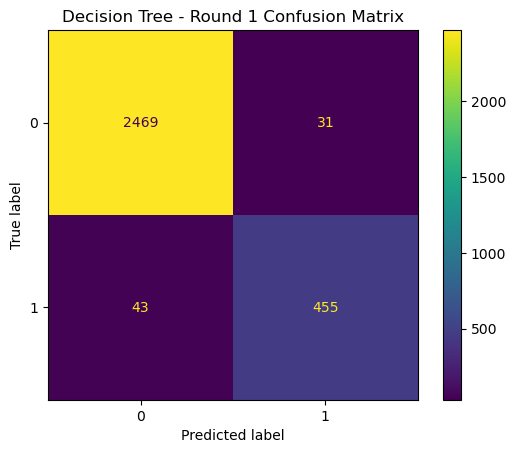

In [93]:
y_pred = tree1.predict(X_test)

## FROM Coursera ##

# Compute values for confusion matrix
tree1_cm = confusion_matrix(y_test, y_pred, labels=tree1.classes_)

# Create display of confusion matrix
tree1_disp = ConfusionMatrixDisplay(confusion_matrix=tree1_cm, 
                                  display_labels=tree1.classes_)

# Plot confusion matrix
tree1_disp.plot(values_format='')
plt.title('Decision Tree - Round 1 Confusion Matrix')

# Display plot
plt.show()

### Create table of decision tree model feature importances
The table below indicates that satisfaction_level has the highest gini importance score with a value of 0.524. This score represents the liklihood of incorreclty classifying a randomly chosen element if it was randomly labeled according to the distribtution of labels in that node.

In [94]:
## FROM Coursera ##

#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree1_importances = pd.DataFrame(tree1.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree1_importances = tree1_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree1_importances = tree1_importances[tree1_importances['gini_importance'] != 0]
tree1_importances

gini_importance
satisfaction_level            0.524622
last_evaluation               0.178501
time_spend_company            0.120792
number_project                0.117102
average_monthly_hours         0.058983

## Random Forest - Round 1


### Construct a Random Forest model 

Here I will construct a random forest model and set up the cross-validated grid-search to exhuastively search for the best model parameters.

In [95]:
## FROM Coursera ##

# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = ('accuracy', 'precision', 'recall', 'f1', 'roc_auc')

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

### Fit the random forest model to the training data

In [96]:
%%time

rf1.fit(X_train, y_train) # --> Wall time: ~10min

CPU times: user 13min 52s, sys: 4.52 s, total: 13min 57s
Wall time: 13min 59s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'))

### Specify path to where I want to save the model

In [97]:
## FROM Coursera ##

# Define a path to the folder where you want to save the model
path = '/Users/tylerfernandez/Documents/'

### Define functions to pickle the model and read in the model

In [98]:
## FROM Coursera ##

def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [99]:
## FROM Coursera ##

def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

### Use the functions defined above to save the model in a pickle file and the read it in

In [100]:
## FROM Coursera ##

# Write pickle
write_pickle(path, rf1, 'hr_rf1')

In [101]:
## FROM Coursera ##

# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

### Identify the best Area Under the Curve (AUC) score achieved by the random forest model on the training set
The best score AUC score achieved by this iteration was 0.98. This would be rated as an Excellent performance. This model has excellent discriminative ability and performs very well in distinguishing between the classes in the target variable Left. An AUC score of 1.0 indicates perfect classification.

In [102]:
## FROM Coursera ##

# Check best AUC score on CV
rf1.best_score_

0.9804250949807172

### Identify the optimal values for the parameters of the random forest model
Now I want to identify optimal values for the parameters of the model to investigate if the model can be improved.

In [103]:
## FROM Coursera ##

# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

### Collect the evaluation scores on the training set for the decision tree and random forest models and create table
Here I will create a table to review and compare the scores of the earlier decision tree and this random forest model. We see that the AUC score for this first iteration of random forest model is higher than the first iteration of the decision tree model. The evaluation scores of the random forest model are better than those of the decision tree model, with the exception of recall (the recall score of the random forest model is approximately 0.001 lower, which is a negligible amount). This indicates that the random forest model mostly outperforms the decision tree model.

In [104]:
## FROM Coursera ##

# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


### Define a function that gets all the scores from a model's predictions
Next, I will evaluate the final model on the test data set.


In [105]:
## FROM Coursera ##

def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

### Use the best performing model to predict on the test set and create table
Now I will use the highest performing random forest model to predict on the test data set and review a table of its performance. The test scores are very similar to the validation scores, which is good. This appears to be a strong model. Since this test set was only used for this model, I can be more confident that my model's performance on this data is representative of how it will perform on new, unseeen data.

In [106]:
## FROM Coursera ##

# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

model  precision    recall        f1  accuracy       AUC
0  random forest1 test   0.964211  0.919679  0.941418  0.980987  0.956439

### Create a confusion matrix visualization to reveal counts of True Negatives, True Positives, False Negatives, and False Positives
Display a confusion matrix for the round 1 random forest.

The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right quadrant displays the number of true positives. True negatives: The number of people who did not leave that the model accurately predicted did not leave. False positives: The number of people who did not leave the model inaccurately predicted as leaving. False negatives: The number of people who left that the model inaccurately predicted did not leave True positives: The number of people who left the model accurately predicted as leaving A perfect model would yield all true negatives and true positives, and no false negatives or false positives. Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model. Check the class balance in the data. In other words, check the value counts in the left column. Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics. The class balance is 83% stayed, and 17% left.

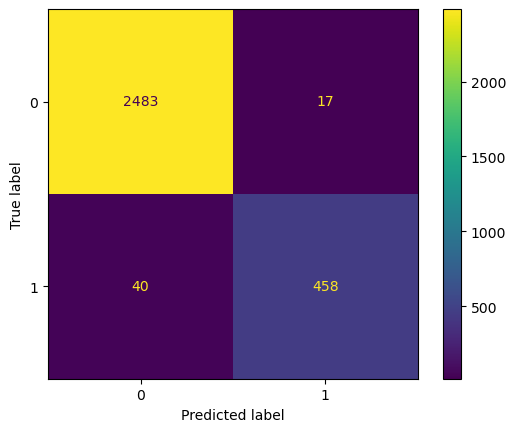

In [107]:
y_pred = rf1.predict(X_test)

## FROM Coursera ##

# Compute values for confusion matrix
rf1_cm = confusion_matrix(y_test, y_pred, labels=rf1.classes_)

# Create display of confusion matrix
rf1_disp = ConfusionMatrixDisplay(confusion_matrix=rf1_cm, 
                                  display_labels=rf1.classes_)

# Plot confusion matrix
rf1_disp.plot(values_format='')

# Display plot
plt.show()

### Calculate and display the feature importance in round 1 of random forest model

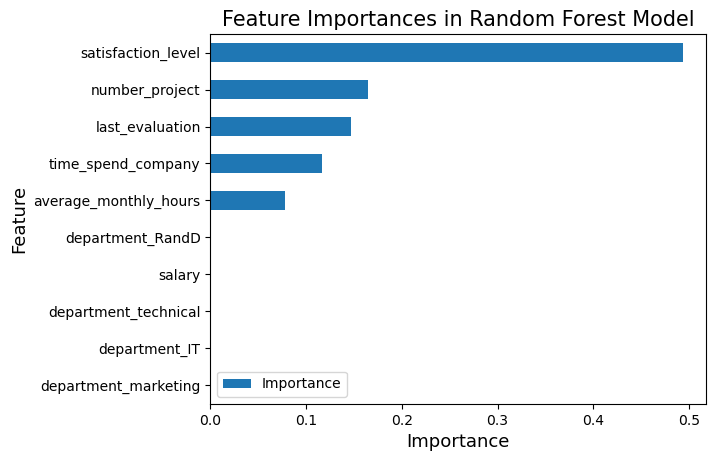

In [108]:
## FROM Coursera ##

# Get feature importances
feat_impt = rf1.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf1.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Feature Importances in Random Forest Model", fontsize=15)
ax1.set_ylabel("Feature", fontsize=13)
ax1.set_xlabel("Importance", fontsize=13)

plt.show()

### Create table of random forest - round 1 feature importances
The table below indicates the top feature is the variable satisfaction_level with a value of 0.493. This means the satisfaction_level variable contributes 0.493 to the prediction accuracy of the model. We will see in later models if this holds true.

In [109]:
# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feat,
    'Importance': feat_impt
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                 Feature  Importance
9     satisfaction_level    0.493536
8         number_project    0.164313
4        last_evaluation    0.146839
6     time_spend_company    0.116408
7  average_monthly_hours    0.077537
3       department_RandD    0.000244
5                 salary    0.000209
2   department_technical    0.000181
1          department_IT    0.000152
0   department_marketing    0.000151


### **Feature Engineering**

You might be skeptical of the high evaluation scores. There is a chance that there is some data leakage occurring. Data leakage is when data is used to train your model that should not be used during training, either because it appears in the test data or because it's not data that you'd expect to have when the model is actually deployed. Training a model with leaked data can give an unrealistic score that is not replicated in production.

In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the average_monthly_hours column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours.

The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models.

I will proceed by dropping satisfaction_level and creating a new feature that roughly captures whether an employee is overworked. I will call this new feature overworked. It will be a binary variable.

## Decision Tree - round 2 ##

### Create new data set by dropping the variable satisfaction_level and then manipulating the variable average_monthly_hours
I will drop the variable satisfaction_level and manipulate the variable average_monthly_hours by first renaming it "overworked". I found earlier that certian employees left due to possibly feeling overworked with a high average monthly hours worked.

In [110]:
## FROM Coursera 

# Drop `satisfaction_level` and save resulting dataframe in new variable
df2 = df_enc.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
df2.head()

last_evaluation  number_project  average_monthly_hours  time_spend_company  \
0             0.53               2                    157                   3   
1             0.86               5                    262                   6   
2             0.88               7                    272                   4   
3             0.87               5                    223                   5   
4             0.52               2                    159                   3   

   work_accident  left  promotion_last_5years  salary  department_IT  \
0              0     1                      0       0              0   
1              0     1                      0       1              0   
2              0     1                      0       1              0   
3              0     1                      0       0              0   
4              0     1                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0

In [111]:
## FROM Coursera ##

# Create `overworked` column. For now, it's identical to average monthly hours.
df2['overworked'] = df2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


### Manipulate the new variable "overworked" by transforming it into a binary variable, wth 1 as "overworked"

166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day. I will define being overworked as working more than 175 hours per month on average. To make the overworked column binary, I will reassign the column using a boolean mask.

df2['overworked'] > 175 creates a series of booleans, consisting of True for every value > 175 and False for every values ≤ 175 .astype(int) converts all True to 1 and all False to 0

In [112]:
## FROM Coursera ##

# Define `overworked` as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Display first few rows of new column
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

### Drop the variable average_monthly_hours column

In [113]:
## FROM Coursera ##

# Drop the `average_monthly_hours` column
df2 = df2.drop('average_monthly_hours', axis=1)

# Display first few rows of resulting dataframe
df2.head()

last_evaluation  number_project  time_spend_company  work_accident  left  \
0             0.53               2                   3              0     1   
1             0.86               5                   6              0     1   
2             0.88               7                   4              0     1   
3             0.87               5                   5              0     1   
4             0.52               2                   3              0     1   

   promotion_last_5years  salary  department_IT  department_RandD  \
0                      0       0              0                 0   
1                      0       1              0                 0   
2                      0       1              0                 0   
3                      0       0              0                 0   
4                      0       0              0                 0   

   department_accounting  department_hr  department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 1   
1                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   

   department_support  department_technical  overworked  
0                   0                     0           0  
1                   0                     0           1  
2                   0                     0           1  
3                   0                     0           1  
4                   0                     0           0

### Create a variable, Y, by isolating the target variable Left from the above dataset
I want to isolate the Left variable from the dataset to be able to create and run the Random Forest model.

### Create a variable, X, by isolating all variables except the target variable, Left, and create a new dataset
Making a datset that does not contain the target variable, Left, is the next step in the construction of the Random Forest model.

In [114]:
## FROM Coursera ##

# Isolate the outcome variable
y = df2['left']

# Select the features
X = df2.drop('left', axis=1)

### Split the data into training and testing sets

In [115]:
## FROM Coursera ##

# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

### Construct round 2 of the decision tree model
I will now construct the 2nd round of the decision tree model and set the up cross-validated grid-search to exhuastively search for the best model parameters.

In [116]:
## FROM Coursera ##

# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = ('accuracy', 'precision', 'recall', 'f1', 'roc_auc')

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

### Create the model and fit it to the training data

Fit the decision tree model to the training data.

In [117]:
%%time

tree2.fit(X_train, y_train)

CPU times: user 1.8 s, sys: 35.1 ms, total: 1.84 s
Wall time: 1.66 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'))

### Check the best parameters

Identify the optimal values for the decision tree parameters.

In [118]:
## FROM Coursera ##

# Check best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

### Find the best Area Under the Curve (AUC) score
0.95 is a strong AUC score, which shows that this decision tree model can predict employees who will leave very well. This model performs very well, even without satisfaction levels and detailed hours worked data.

In [119]:
## FROM Cousera ##

# Check best AUC score on CV
tree2.best_score_

0.9586752505340426

### Find and display other scores

Next, I will check the other scores of this model and compare it to the original decision tree's scores. We see that this 2nd decision tree had worse scores than the original. That should be expected since this model's data had less variables to predict with. Still, it is a good perforing model with an AUC score of 0.95, which is considered Excellent.

In [120]:
## FROM Coursera ##

# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675


### Create a confusion matrix visualization to reveal counts of True Negatives, True Positives, False Negatives, and False Positives
Display a confusion matrix for the round 2 decision tree

The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right quadrant displays the number of true positives. True negatives: The number of people who did not leave that the model accurately predicted did not leave. False positives: The number of people who did not leave the model inaccurately predicted as leaving. False negatives: The number of people who left that the model inaccurately predicted did not leave True positives: The number of people who left the model accurately predicted as leaving A perfect model would yield all true negatives and true positives, and no false negatives or false positives. Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model. Check the class balance in the data. In other words, check the value counts in the left column. Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics. The class balance is 83% stayed, and 17% left. The model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case. But this is still a strong model.

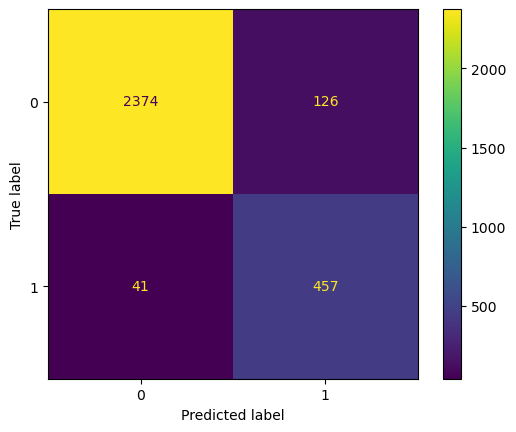

In [121]:
y_pred = tree2.predict(X_test)

## FROM Coursera ##

# Compute values for confusion matrix
tree2_cm = confusion_matrix(y_test, y_pred, labels=tree2.classes_)

# Create display of confusion matrix
tree2_disp = ConfusionMatrixDisplay(confusion_matrix=tree2_cm, 
                                  display_labels=tree2.classes_)

# Plot confusion matrix
tree2_disp.plot(values_format='')

# Display plot
plt.show()

### Decision tree splits
For exploratory purpose, I want to inspect the splits of the decision tree model and the most important features in the decision tree model.

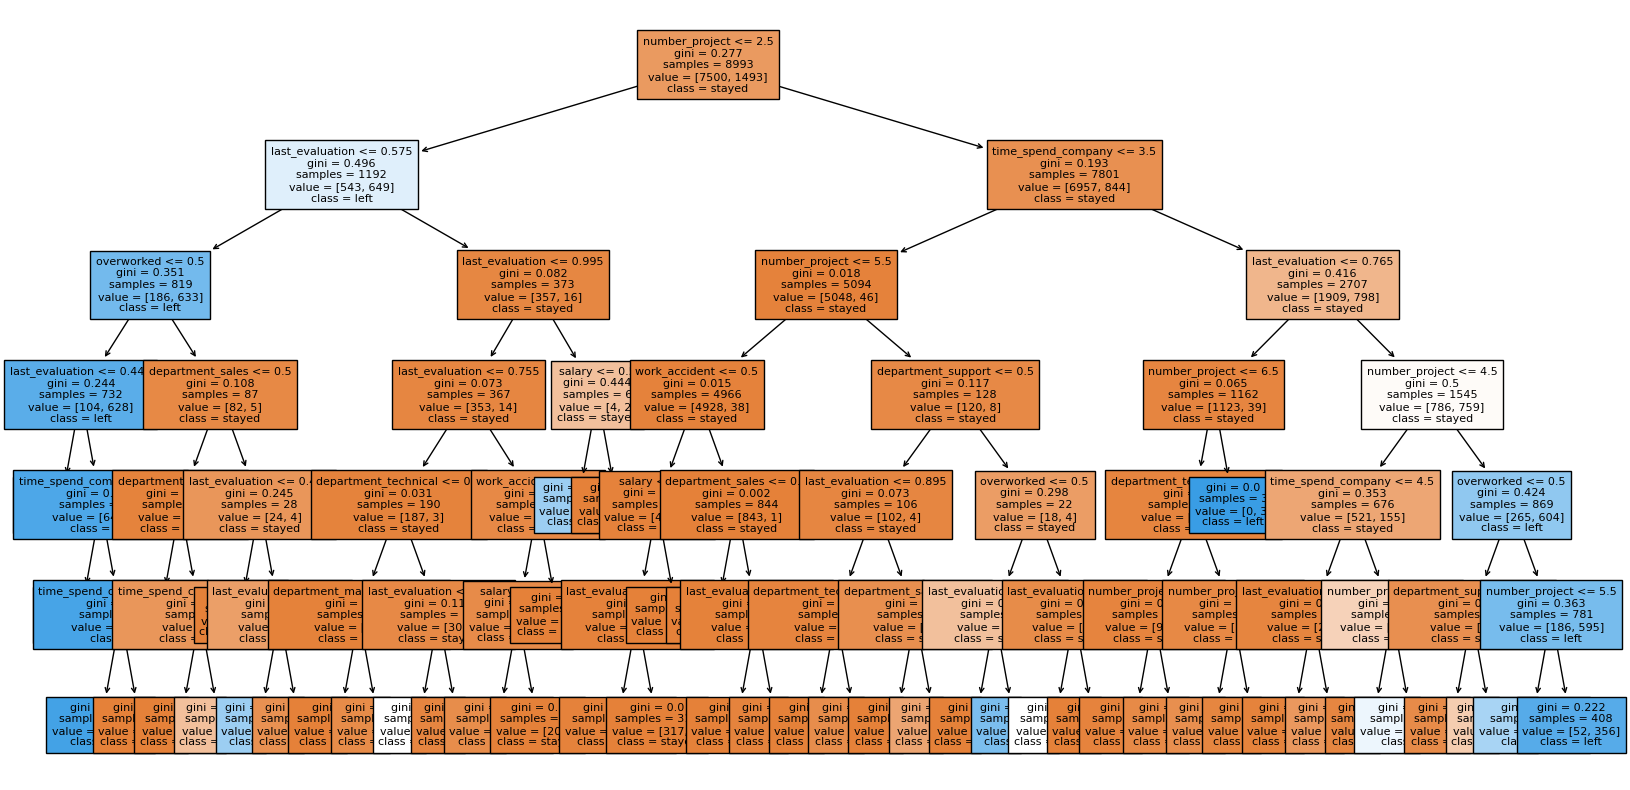

In [122]:
## FROM Coursera ##

## This one seems to be the correct way to make the decision tree figure ##
feature_names = list(X.columns)

plt.figure(figsize=(20, 10))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=8, feature_names=feature_names, 
          class_names=['stayed', 'left'], filled=True)
plt.savefig('decision_tree.png')  # Adjust the filename and format as needed
plt.show()


### Create table of decision tree model feature importances

In [123]:
## FROM Coursera ##

#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

gini_importance
last_evaluation              0.343958
number_project               0.343385
time_spend_company           0.215681
overworked                   0.093498
department_support           0.001142
salary                       0.000910
department_sales             0.000607
department_technical         0.000418
work_accident                0.000183
department_IT                0.000139
department_marketing         0.000078

### Create barchart visualization of decision tree - round 2 gini importances
The barplot above shows that in this decision tree model, the variables last_evaluation, number_project, and overworked have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, left.

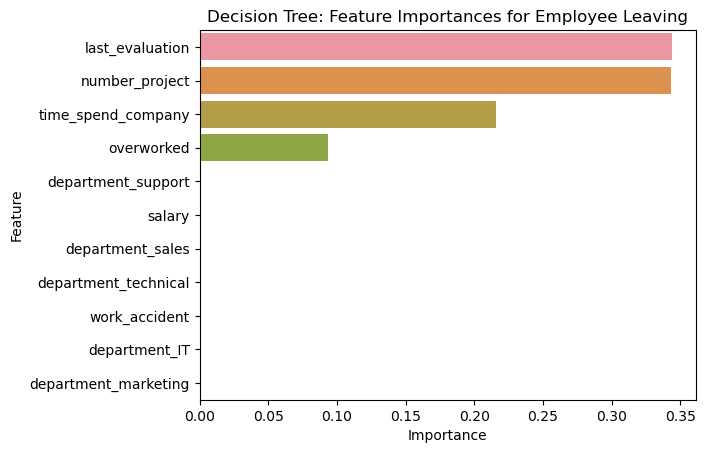

In [124]:
## FROM Coursera ##

sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

### Random Forest - round 2 ##
### Construct a Random Forest model 

Here I will construct the 2nd random forest model and set up the cross-validated grid-search to exhuastively search for the best model parameters.

In [125]:
## FROM Coursera ##

# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,5],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = ('accuracy', 'precision', 'recall', 'f1', 'roc_auc')

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

### Fit the random forest model to the training data

In [126]:
%%time
rf2.fit(X_train, y_train)

CPU times: user 9min 31s, sys: 3.86 s, total: 9min 34s
Wall time: 9min 36s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'))

### Pickle the model and read in the model

In [127]:
## FROM Coursera ##

# Write pickle
write_pickle(path, rf2, 'hr_rf2')

In [128]:
## FROM Coursera ##

# Read in pickle
rf2 = read_pickle(path, 'hr_rf2')

### Identify the optimal values for the parameters of the random forest model
Now I want to identify optimal values for the parameters of the model to investigate if the model can be improved.

In [129]:
## FROM Coursera ##

# check best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 500}

### Identify the best Area Under the Curve (AUC) score achieved by the random forest model on the training set
The best score AUC score achieved by this iteration was 0.986. This would be rated as an Excellent performance. This model has excellent discriminative ability and performs very well in distinguishing between the classes in the target variable Left. An AUC score of 1.0 indicates perfect classification.

In [130]:
## FROM Coursera ##

# Check best AUC scores on CV
rf2.best_score_

0.9650358245759917

### Collect the evaluation scores on the training set for the decision tree and random forest models and create table
Here I will create a table to review and compare the scores of the second iteration of the decision tree and this second iteration of random forest model. 

We see that the AUC score for this second iteration of random forest model is higher than the second iteration of the decision tree model. The evaluation scores of the second iteration of the random forest model are mixed; some scores of the second version of the random forest model are better than those of the second version of the decision tree model, and vice versa. The accuracy of the models is extremely similar. The random forest performs better than the decision tree if using AUC as the deciding metric.

In [131]:
## FROM Coursera ##

# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        F1  accuracy       auc
0  random forest2 cv   0.866572  0.876747  0.871321  0.957078  0.965036


### Score the champion model on the test set
This seems to be a stable, well-performing final model. Plot a confusion matrix to visualize how well it predicts on the test set.

In [132]:
## FROM Coursera ##

# Get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

model  precision   recall        f1  accuracy       AUC
0  random forest2 test   0.871345  0.89759  0.884273  0.960974  0.935595

### Create a confusion matrix visualization to reveal counts of True Negatives, True Positives, False Negatives, and False Positives
Display a confusion matrix for the round 2 random forest

The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right quadrant displays the number of true positives. True negatives: The number of people who did not leave that the model accurately predicted did not leave. False positives: The number of people who did not leave the model inaccurately predicted as leaving. False negatives: The number of people who left that the model inaccurately predicted did not leave True positives: The number of people who left the model accurately predicted as leaving A perfect model would yield all true negatives and true positives, and no false negatives or false positives. Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model. Check the class balance in the data. In other words, check the value counts in the left column. Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics. The class balance is 83% stayed, and 17% left. The model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case. But this is still a strong model.


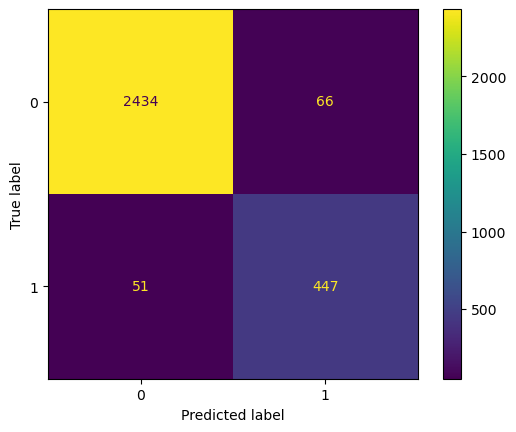

In [133]:
## FROM Coursera ##

# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

### Create barchart visualization of random forest - round 2 feature importance

Now, plot the feature importances for the random forest model.

The plot above shows that in this random forest model, last evaluation, number of projects, time spend at company, and overworked have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, left, and they are the same as the ones used by the decision tree model.

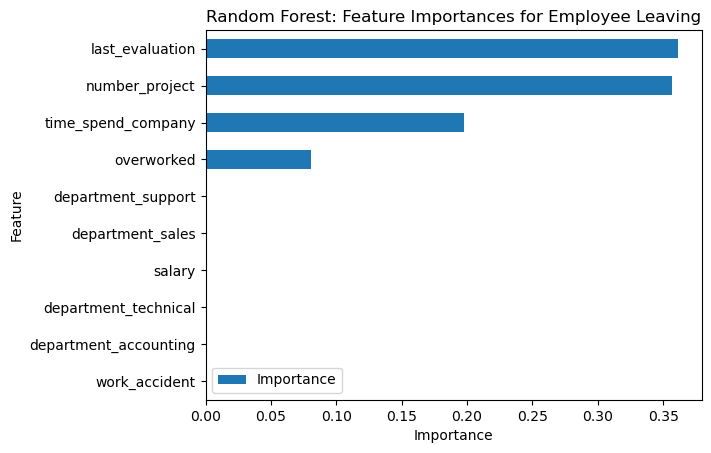

In [134]:
## FROM Coursera ##

# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

### Create table of random forest - round 2 feature importances

In [135]:
# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feat,
    'Importance': feat_impt
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                 Feature  Importance
9        last_evaluation    0.361226
7         number_project    0.356944
8     time_spend_company    0.197746
6             overworked    0.080767
4     department_support    0.000723
5       department_sales    0.000630
3                 salary    0.000577
2   department_technical    0.000466
1  department_accounting    0.000203
0          work_accident    0.000171


### Reflecting on these questions as I complete the constructing stage:

Do I notice anything odd?
- The only thing I could note as odd would be the poor performance of the logistic regression model. Although I found a high-performing model in the Random Forest - Round 2 model, I initially suspected the Logistic Regression model to perform best.

Which independent variables did I choose for the model and why?
- I initially chose all variables for the first round of model creation. For round 2, I removed the "average_monthly_hours" and "number_project" variables and combined them to make a new variable "overworked", which was a binary variable. I chose to include all variables to ensure the model had the most data possible.

Are each of the assumptions met?
- For every model, all assumptions are met.

How well does my model fit the data?
- The model fits the data extremely well. Evaluation metrics confirm this.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



### Reflect on these questions as you complete the executing stage.

#### Do I think my model could be improved? Why or why not? How?
- The model can be improved, but only to a point. More data, or additional variables would be needed to improve the models. Additional variable creation, by way of combining variables, could also improve the model.

#### Given what I know about the data and the models I was using, what other questions could I address for the team?
- I can address additional basic information like trends in average monthly hours and number of projects, correlations between satisfaction level and last evaluation score, and many others.

#### Do I have any ethical considerations in this stage?
- My ethical concerns involve the use of the model to predict and then make decision without additional human input and final say in any decision made with the model's output. Adhering to all applicable laws and policies, as well as creating and maintaining appropriate company policies would be of utmost ethical concern. Also ensuring that employees have awareness of the model and its inputs and outputs is imperative to its fair use.




## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






### Review all model evaluation scores

After review, the model with the highest evaluation metric scores is the Random Forest - Round 1. It won all score metric categories except AUC (area under the ROC curve), which was won by the Decision Tree - Round 1 model. The worst performing model was the Logistic Regression model. It performed poorly in the desired task to predict if someone would leave the company.

In [136]:
print(lr_report)
print(tree1_cv_results)
print(tree2_cv_results)
print(rf1_test_scores)
print(rf2_test_scores)

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.45      0.27      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.62      2792
             weighted avg       0.79      0.82      0.80      2792

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675
                 model  precision    recall        f1  accuracy       AUC
0  random forest1 test   0.964211  0.919679  0.941418  0.980987  0.956439
                 model  precision   recall        f1  accuracy       AUC
0  random forest2 test   0.871345  0.89759  0.884273  0.960974  0.935595


### Summary of model results

In evaluating the best performing model, the Random Forest - Round 1, I found that manipulating the original data by creating a new variable, "overworked", from the variables "average_monthly_hours", and "number_project", did not increase model performance. This manipulation decreased its performance considerably in all evaluation metrics. Perhaps combining data into new variables in this particular dataset was not favorable to machine learning models, specifically Random Forests. Or, perhaps the wrong two variables were combined, and a different set or sets could be used to better support an accurate Random Forest model. Earlier in the analysis, I stated there was 45 total ways to combine appropriate variables. I only combined two, so the possibilities explored in this analysis in terms of creating new variables was limited. There is room for improvement to find the decisive combinations of variables that could improve some or all models, although that would be a large project in terms of computing time, manual work to manipulate the data, and so on.

The worst performing model was the Logistic Regression model. This extremely low scoring model could be improved, possibly with more data, removing additional outliers, or adding newly created variables from exisitng ones, like in the Random Forest and Decision Tree models. Although the evaluation metrics for the Logistic Regression model are not terribly low for predicting when an employee would not leave, the target was to predict if they left. This may be a weakness of this model with the provided data. 

## Conclusion, Recommendations, Next Steps


### Conclusion

In conclusion, this project achieved its aim to use a previously gathered dataset to be used in a machine learning or logistic regression model to predict if an employee were to leave the company. The analysis showed patterns in employee behavior in terms of if the employee left or not based on certain variables, like satisfaction, average monthly hours, promotions, and several others. Given enough variables and enough raw data, the machine learning and logistic regression models can be used to predict if an employee would leave the company. It is worthwile to pursue further development and exploration of this type of analysis and model building to help the company and its employees.

### Recommendations:

Employee Satisfaction:

- Focus on strategies to enhance employee satisfaction, addressing specific concerns and improving the overall work environment.
- Regularly assess employee satisfaction levels to identify and mitigate potential issues proactively.

Workload Management:

- Establish a balanced workload by managing the number of projects and average monthly hours to prevent employee burnout and dissatisfaction.

Employee Development:

- Foster career development opportunities, ensuring that promotions and recognitions are distributed fairly and transparently.

Model Utilization:

- Employ the predictive models, particularly Random Forest or XGBoost, to forecast potential employee churn, allowing for timely interventions.
- Continuously update and refine the models to adapt to evolving organizational dynamics and employee behaviors.

### Next Steps

The next steps in this would be to further develop the dataset and variables, as well as determine the level of accuracy and other evaluation metrics needed to use the model in any real way, such as workforce planning, business development, employee management, and so on. Ensuring this model is used ethically and legally is imperative.